# Business Understanding

## Business Objective

**Primary Business Objective**

Develop a predictive model to accurately estimate apartment rental prices based on property characteristics, location, and amenities to support:
- Property investment decisions

- Pricing strategy optimization for landlords

- Market valuation for real estate platforms

- Rental budget planning for tenants

**Success Criteria**
- Achieve prediction accuracy within ±10% of actual rental prices

- Model performance: MAPE < 20%

- Identify top 5-7 most influential pricing factors

- Deploy model for real-time price estimation

https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

## Data Understanding

This dataset contains 100,000 apartment rental classified ads from the USA, providing comprehensive insights into the rental housing market. With 22 features including pricing, location, amenities, and property characteristics, it offers valuable opportunities for business intelligence and market analysis.

id = unique identifier of apartment

category = category of classified

title = title text of apartment

body = body text of apartment

amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc.

bathrooms = number of bathrooms

bedrooms = number of bedrooms

currency = price in current

fee = fee

has_photo = photo of apartment

pets_allowed = what pets are allowed dogs/cats etc.

price = rental price of apartment

price_display = price converted into display for reader

price_type = price in USD

square_feet = size of the apartment

address =  where the apartment is located

cityname =  where the apartment is located

state =  where the apartment is located

latitude = where the apartment is located

longitude = where the apartment is located

source = origin of classified

time = when classified was created

# Data Preparation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
combo = pd.read_excel('Apartment For Rent.xlsx')

In [3]:
combo.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Data Cleaning

## Duplicate Value Handling

In [4]:
len(combo.drop_duplicates()) / len(combo)

0.9991599159915991

In [5]:
combo = combo.drop_duplicates()

In [6]:
len(combo.drop_duplicates()) / len(combo)

1.0

there are minimum number of data duplication and now the data is clean.

## Missing Value Handling

In [7]:
combo.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16079
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60688
price                0
price_display        0
price_type           0
square_feet          0
address          91965
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [8]:
for column in combo.columns:
    print(f"============= {column} =================")
    display(combo[column].value_counts())
    print()

============= id =================


id
5668640009    1
5197764078    1
5197753032    1
5197758008    1
5197758753    1
             ..
5508896021    1
5508896917    1
5508897701    1
5508901114    1
5121218844    1
Name: count, Length: 99906, dtype: int64


============= category =================


category
housing/rent/apartment            99845
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64


============= title =================


title
Apartment in great location                                         1068
Apartment in prime location                                         1034
Apartment in quiet area, spacious with big kitchen                  1027
Super Cute! Apartment for Rent!                                     1021
This Apartment is a must see!                                       1008
                                                                    ... 
Three BR Apartment - Welcome Home to Bexley Park.                      1
$1,603 / One BR - Great Deal. MUST SEE!                                1
Rare Two BR, One BA with a loft in prime Chestnut Hill location!       1
Milford - 2bd/One BA 800sqft Apartment for rent                        1
Large Remodeled Two BR 1. Five BA Apartment Home                       1
Name: count, Length: 58722, dtype: int64


============= body =================


body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provides you with immediate access to shopping, entertainment, transportation and is directly across from Northwest Hospital. Commuters enjoy easy access to Baltimore's Inner, Baltimore Washington International Airport BWI, Owings Mills, Pikesville, and Catonsville. The Crossing enjoy the comforts of an apartment they are truly proud to with wall-to-wall carpeting, fully-equipped kitchens with dishwashers, over-sized closets and expansive balconies. Outside your home, Northwest Crossing boasts a fitness facilities, basketball and professionally landscaped grounds with picnic areas. Take pleasure in knowing that our professional management team is here to assist you with any need great or small. We are excited to meet you and welcome you home!                                                           


============= amenities =================


amenities
Parking                                                                                                                    6202
Parking,Storage                                                                                                            2118
Gym,Pool                                                                                                                   1875
Pool                                                                                                                       1489
Gym,Parking,Pool                                                                                                           1188
                                                                                                                           ... 
Elevator,Gated,Parking,Wood Floors                                                                                            1
AC,Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Patio/Deck,Refrigerator,Tennis,Was


============= bathrooms =================


bathrooms
1.0    56561
2.0    36751
1.5     3184
2.5     2085
3.0      898
3.5      209
4.0      120
4.5       42
5.0       20
0.0       15
6.0        9
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: count, dtype: int64


============= bedrooms =================


bedrooms
2.0    46169
1.0    40634
3.0    10595
4.0     1501
0.0      662
5.0      288
6.0       47
7.0        4
8.0        3
2.5        2
9.0        1
Name: count, dtype: int64


============= currency =================


currency
USD    99906
Name: count, dtype: int64


============= fee =================


fee
No     99705
Yes      201
Name: count, dtype: int64


============= has_photo =================


has_photo
Yes          56184
Thumbnail    34470
No            9252
Name: count, dtype: int64


============= pets_allowed =================


pets_allowed
Cats,Dogs    37245
Cats          1846
Dogs           127
Name: count, dtype: int64


============= price =================


price
1350.0    576
850.0     549
1200.0    538
950.0     530
1100.0    525
         ... 
4734.0      1
4065.0      1
3062.0      1
5147.0      1
4326.0      1
Name: count, Length: 3690, dtype: int64


============= price_display =================


price_display
1350     576
850      548
1200     538
950      530
1100     525
        ... 
32000      1
369        1
5212       1
2413       1
4326       1
Name: count, Length: 3721, dtype: int64


============= price_type =================


price_type
Monthly    99903
Weekly         3
Name: count, dtype: int64


============= square_feet =================


square_feet
1000    1501
900     1394
800     1362
700     1355
750     1245
        ... 
4729       1
2335       1
3234       1
2989       1
2932       1
Name: count, Length: 2540, dtype: int64


============= address =================


address
8215 S.W 72nd Avenue        19
2647 Eastgate Road           8
901 Valley View Circle       7
700 Watkins Ave              6
5903 Danny Kaye Drive        6
                            ..
2919 West Avenue             1
7228 N Burlington Avenue     1
1616 Anthony St              1
714 N 95th St                1
4507 South Indiana           1
Name: count, Length: 7770, dtype: int64


============= cityname =================


cityname
Dallas          2866
Denver          2764
Los Angeles     2435
Las Vegas       1859
Arlington       1577
                ... 
Edinburg           1
Rockledge          1
Elk Point          1
Sugar Hill         1
Willow Grove       1
Name: count, Length: 2982, dtype: int64


============= state =================


state
TX    11279
CA    10340
VA     8319
NC     6322
CO     6294
FL     5808
MD     5314
MA     5052
OH     4911
GA     4794
NJ     4507
NV     2826
WA     2624
AZ     2379
LA     1359
MO     1203
PA     1139
TN     1114
IL     1036
NE     1020
KY     1003
OK      962
SC      908
KS      899
UT      809
ND      743
NH      735
MI      710
NY      661
AR      598
MN      580
CT      515
IN      509
WI      432
IA      372
AL      354
OR      279
VT      125
RI      119
MS      107
ID       96
DC       93
MT       88
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64


============= latitude =================


latitude
42.3280    543
30.3054    514
40.7220    501
38.9118    445
33.7848    332
          ... 
42.1079      1
41.5847      1
25.8500      1
30.3566      1
43.0675      1
Name: count, Length: 7214, dtype: int64


============= longitude =================


longitude
-71.0710     543
-97.7497     514
-74.0644     501
-77.0132     437
-84.3922     332
            ... 
-82.4202       1
-84.5965       1
-78.0167       1
-124.1555      1
-87.9767       1
Name: count, Length: 7273, dtype: int64


============= source =================


source
RentDigs.com         91327
RentLingo             6924
ListedBuy              570
GoSection8             437
RealRentals            268
tenantcloud            124
BostonApartments        94
RENTCafÈ                41
Listanza                29
SpreadMyAd              22
RENTOCULAR              18
RentFeeder              12
Claz                     8
Home Rentals             8
Nest Seekers             5
vFlyer                   5
rentbits                 5
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: count, dtype: int64


============= time =================


time
1577359251    5
1577359489    5
1577016866    5
1577358741    4
1577360062    4
             ..
1566682061    1
1566682152    1
1565082250    1
1565168066    1
1544185659    1
Name: count, Length: 75633, dtype: int64

There are missing values in important features: amenities, pets_allowed, and address. In writer's opinion, missing value in amenities and pets_allowed can be replaced with No to signify whether there are amenities and/or pets are allowed. The rows with missing values in address column will be removed.

In [9]:
combo = combo[combo['address'].notna()]

In [10]:
combo = combo[combo['address'].str.strip() != '']

In [11]:
combo = combo[combo['cityname'].notna()]
combo = combo[combo['state'].notna()]

In [12]:
combo['amenities'] = combo['amenities'].fillna('No Amenities')

In [13]:
combo['pets_allowed'] = combo['pets_allowed'].fillna('No Pets')

In [14]:
combo.isna().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

# Data Manipulation

Amenities column has multiple values that can be melted into different columns containing 0 or 1 (1 it has the amenities). This also happens to which pets are allowed or not and which are allowed.

In [15]:
amenities_dummies = combo['amenities'].str.get_dummies(sep=',')

In [16]:
combo = combo.join(amenities_dummies)

In [17]:
combo = combo.drop('amenities', axis=1)

In [18]:
pets_dummies = combo['pets_allowed'].str.get_dummies(sep=',')
combo = combo.join(pets_dummies)
combo = combo.drop('pets_allowed', axis=1)

# EDA

## Descriptive Analysis

In [19]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7869 entries, 0 to 84457
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7869 non-null   int64  
 1   category            7869 non-null   object 
 2   title               7869 non-null   object 
 3   body                7869 non-null   object 
 4   bathrooms           7869 non-null   float64
 5   bedrooms            7869 non-null   float64
 6   currency            7869 non-null   object 
 7   fee                 7869 non-null   object 
 8   has_photo           7869 non-null   object 
 9   price               7869 non-null   float64
 10  price_display       7869 non-null   object 
 11  price_type          7869 non-null   object 
 12  square_feet         7869 non-null   int64  
 13  address             7869 non-null   object 
 14  cityname            7869 non-null   object 
 15  state               7869 non-null   object 
 16  latitude  

In [20]:
combo[['bathrooms','bedrooms', 'square_feet','price']].describe()

,bathrooms,bedrooms,square_feet,price
count,7869.000000,7869.000000,7869.000000,7869.000000
mean,1.359512,1.790316,957.367518,1465.505781
std,0.640368,1.020477,570.949037,1155.847689
min,0.000000,0.000000,106.000000,224.000000
25%,1.000000,1.000000,630.000000,900.000000
50%,1.000000,2.000000,793.000000,1210.000000
75%,2.000000,2.000000,1100.000000,1675.000000
max,8.500000,9.000000,11318.000000,52500.000000


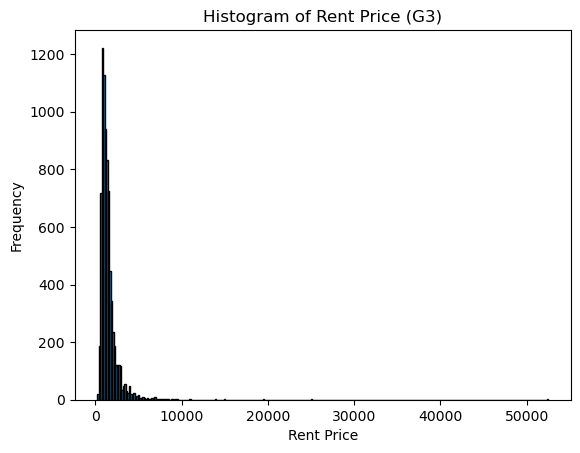

In [21]:
plt.hist(combo['price'], edgecolor='black', bins=300)
plt.title('Histogram of Rent Price (G3)')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

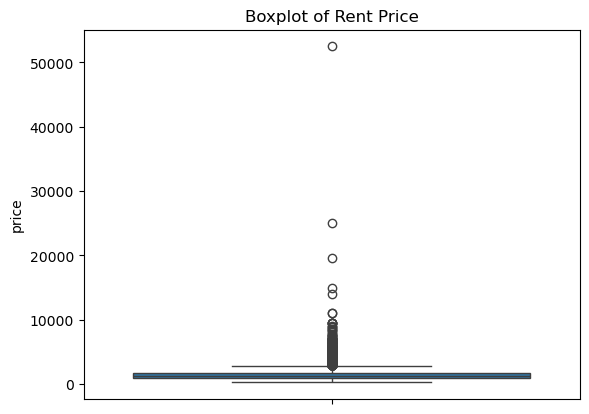

In [22]:
sns.boxplot(y='price', data=combo)
plt.title('Boxplot of Rent Price')
plt.show()

The rent price is seen to have left skewness, this means that the data is mostly in lower values. The boxplot shows outliers on the higher end of the whisker, this will be normalized to make the analysis more robust.

In [23]:
Q1 = combo['price'].quantile(0.25)
Q3 = combo['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
combo = combo[(combo['price'] >= lower_bound) & (combo['price'] <= upper_bound)]

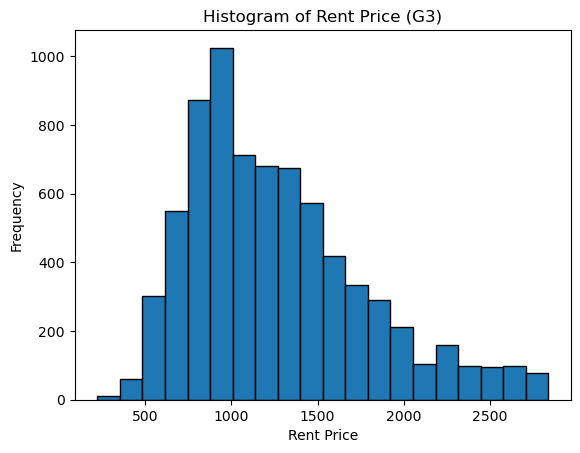

In [24]:
plt.hist(combo['price'], edgecolor='black', bins=20)
plt.title('Histogram of Rent Price (G3)')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

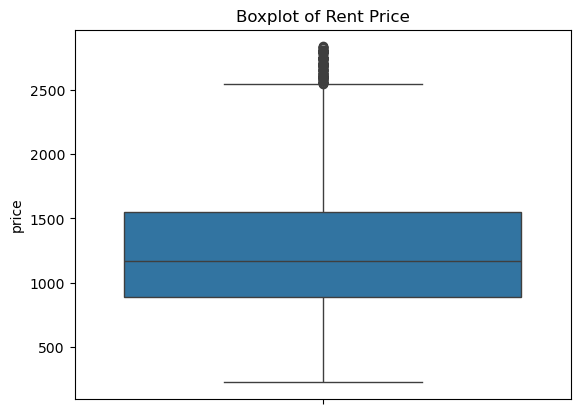

In [25]:
sns.boxplot(y='price', data=combo)
plt.title('Boxplot of Rent Price')
plt.show()

now the data is more normally distributed.

## Boxplot Against Price

In [26]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7343 entries, 0 to 84457
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7343 non-null   int64  
 1   category            7343 non-null   object 
 2   title               7343 non-null   object 
 3   body                7343 non-null   object 
 4   bathrooms           7343 non-null   float64
 5   bedrooms            7343 non-null   float64
 6   currency            7343 non-null   object 
 7   fee                 7343 non-null   object 
 8   has_photo           7343 non-null   object 
 9   price               7343 non-null   float64
 10  price_display       7343 non-null   object 
 11  price_type          7343 non-null   object 
 12  square_feet         7343 non-null   int64  
 13  address             7343 non-null   object 
 14  cityname            7343 non-null   object 
 15  state               7343 non-null   object 
 16  latitude  

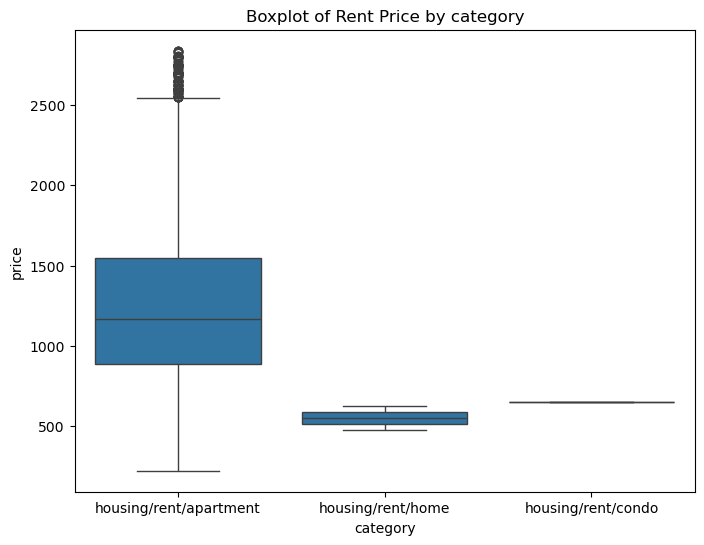

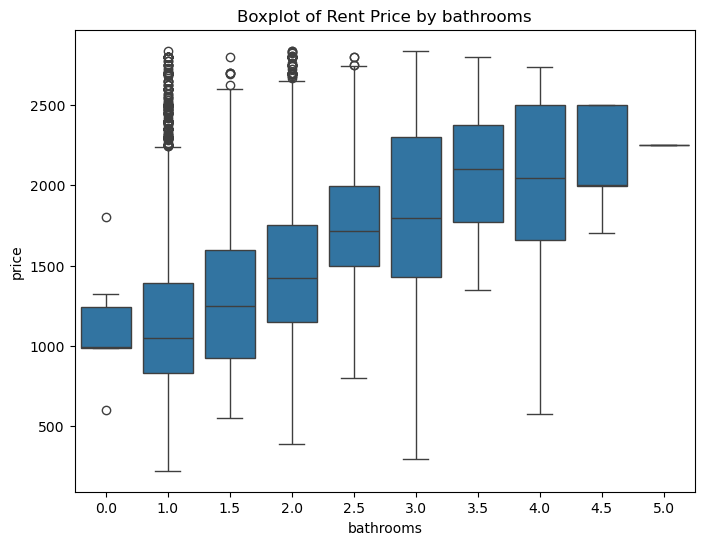

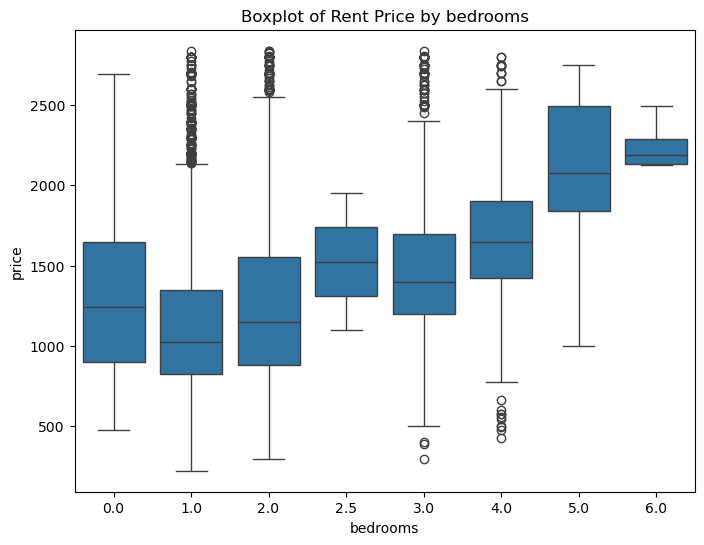

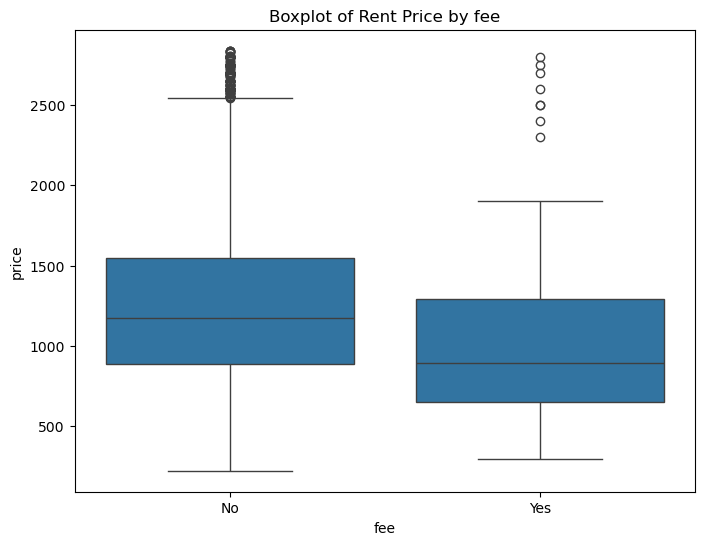

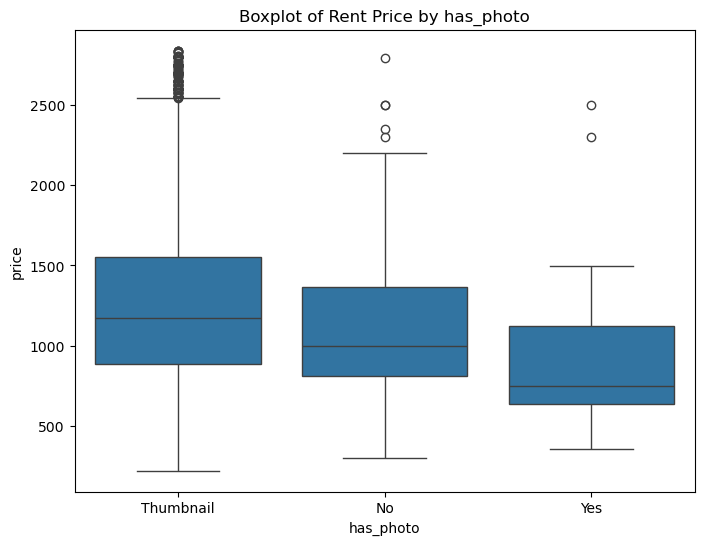

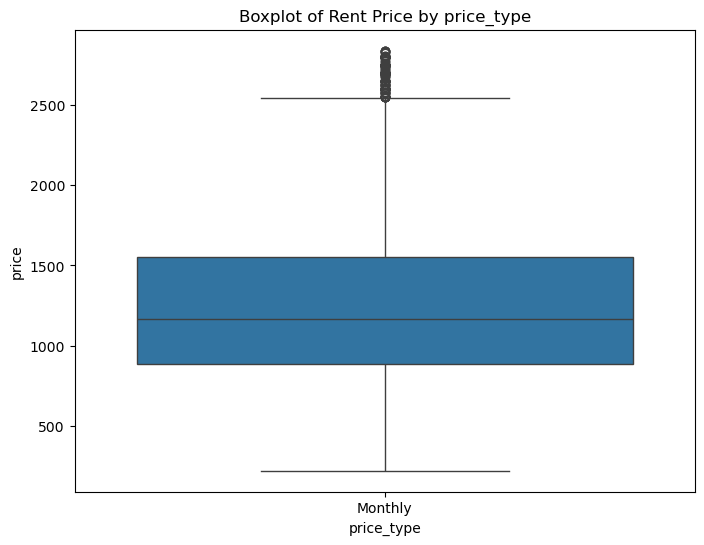

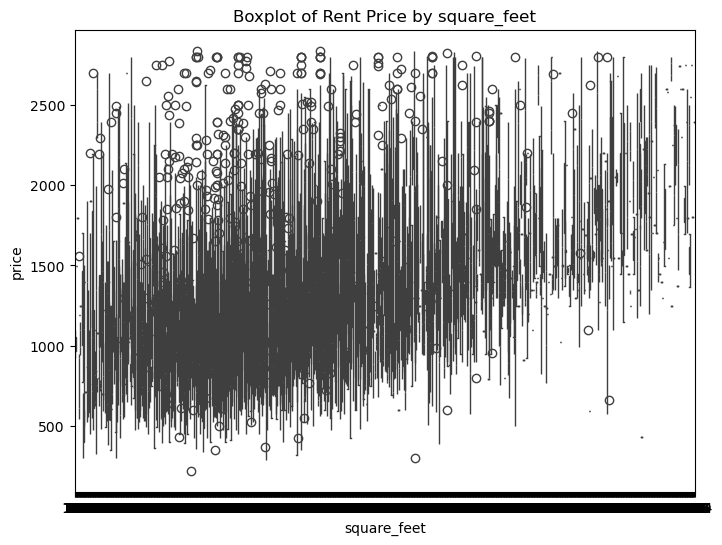

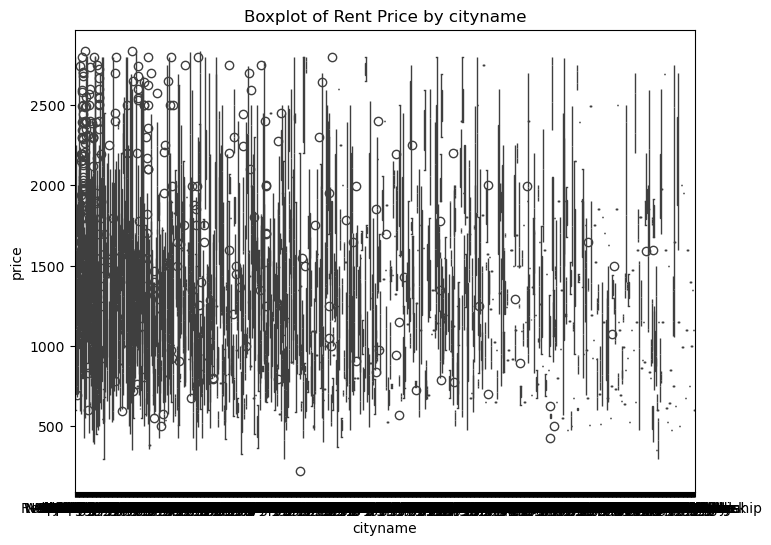

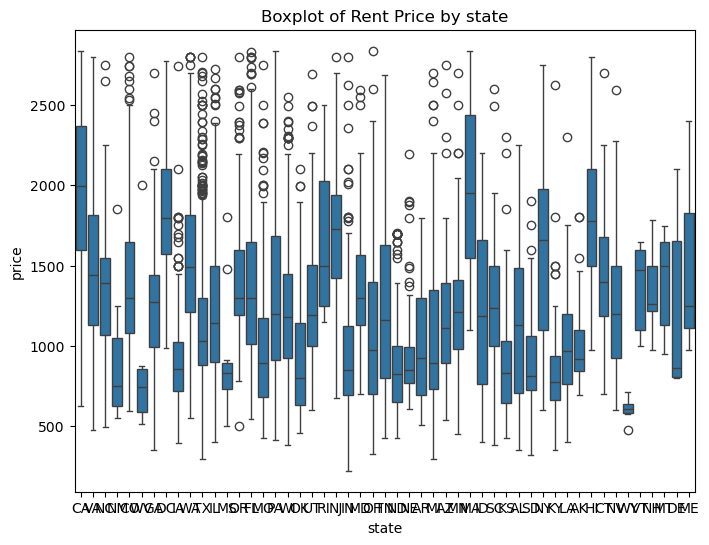

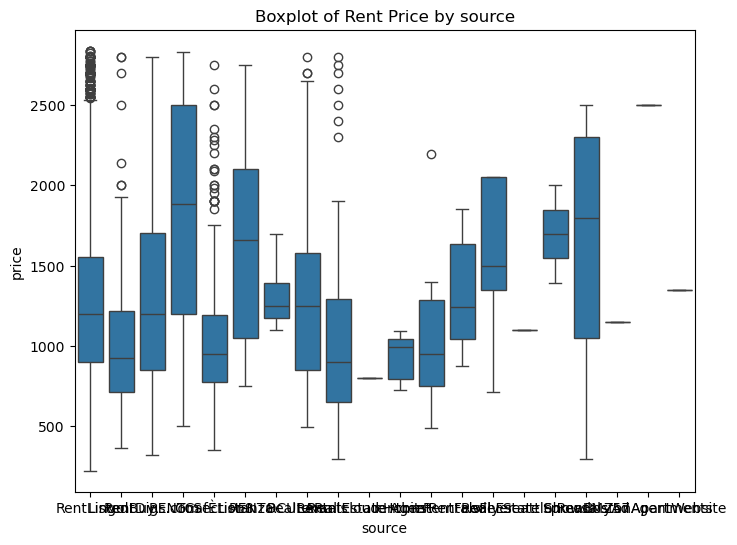

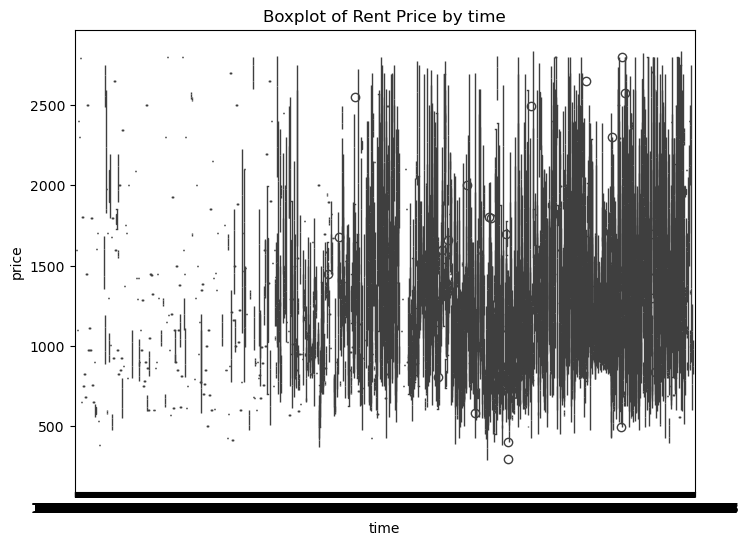

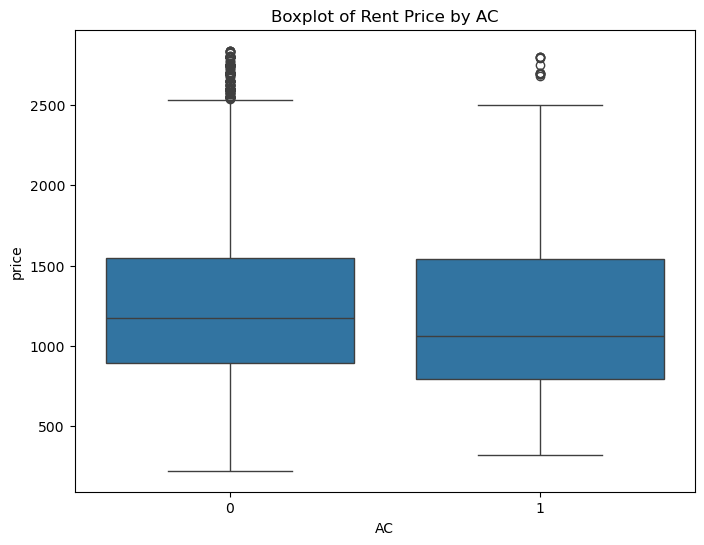

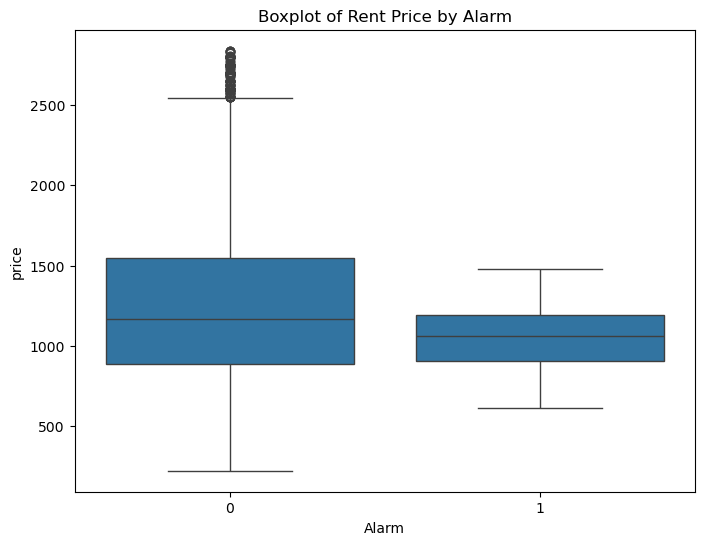

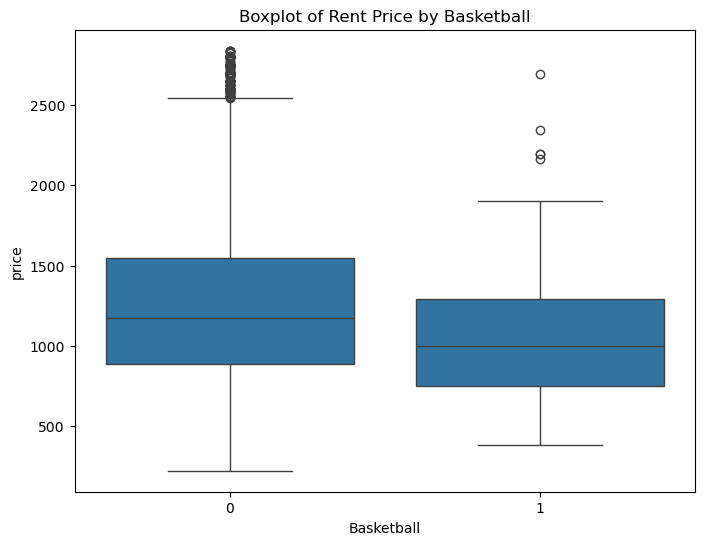

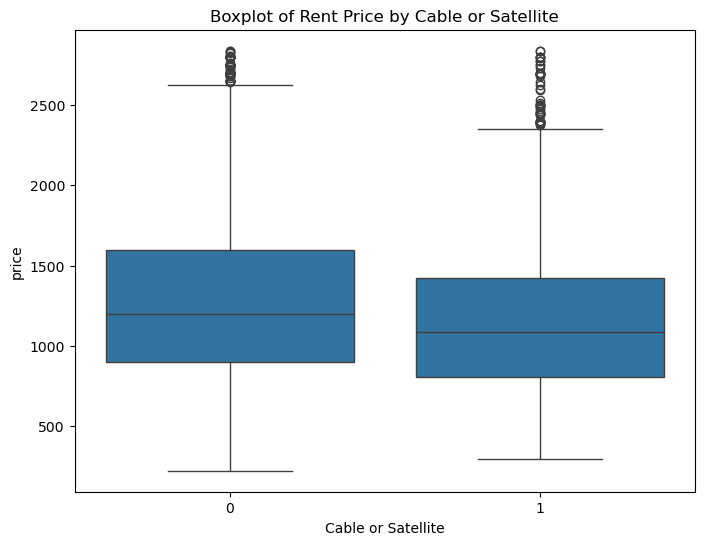

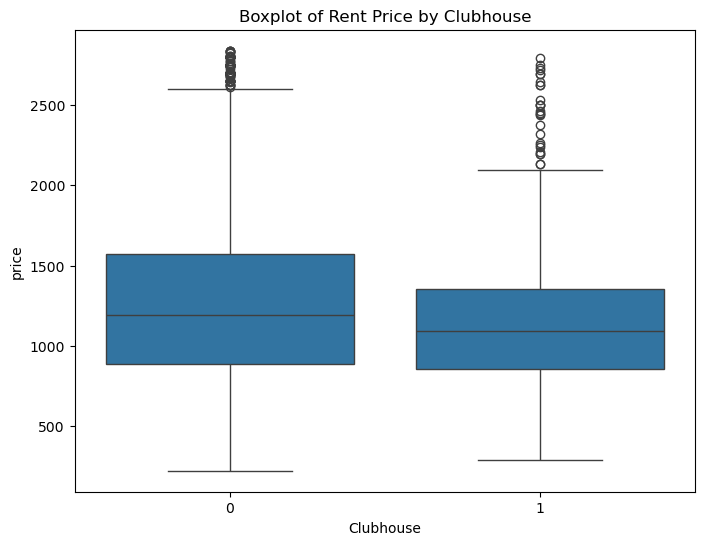

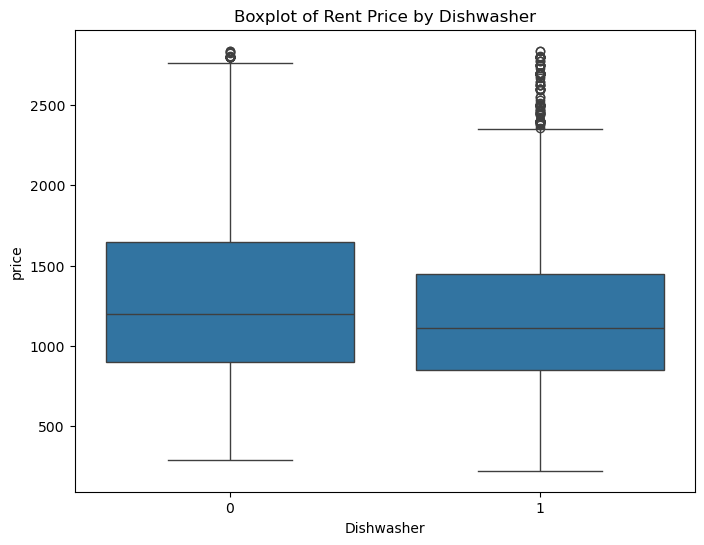

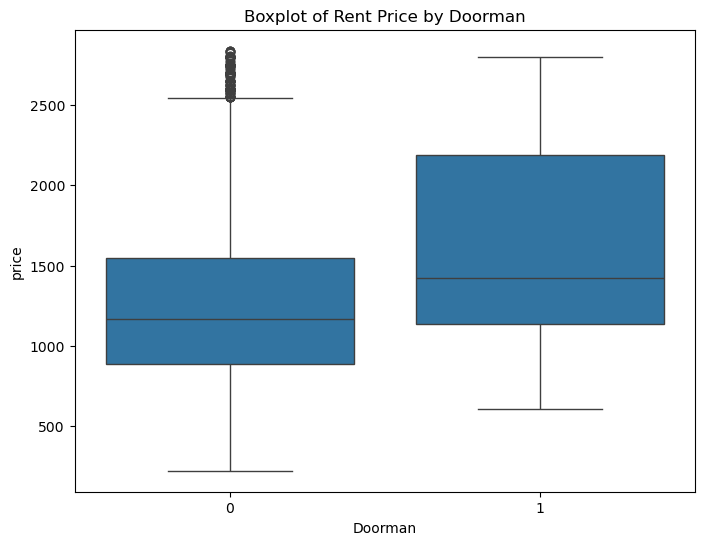

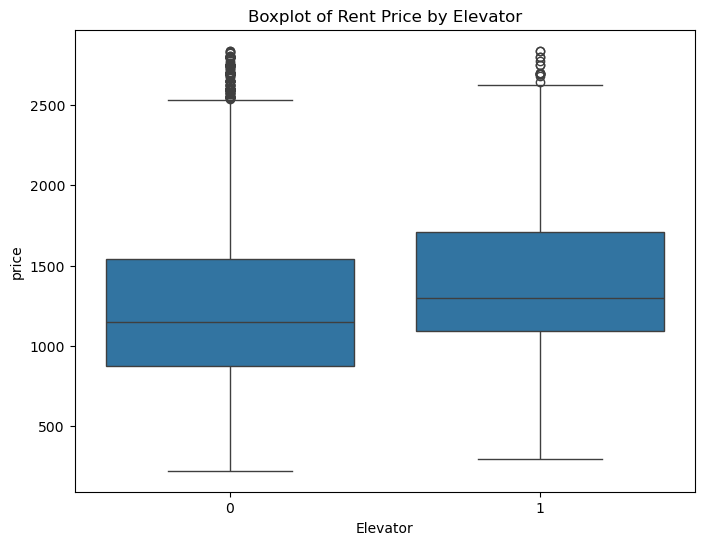

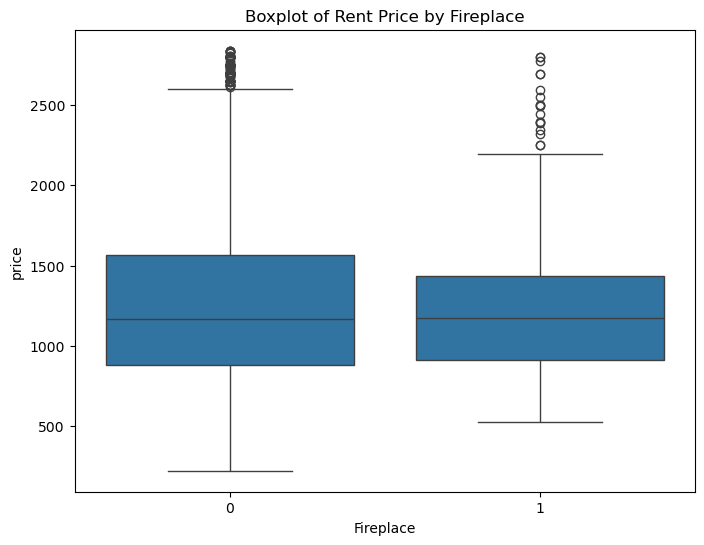

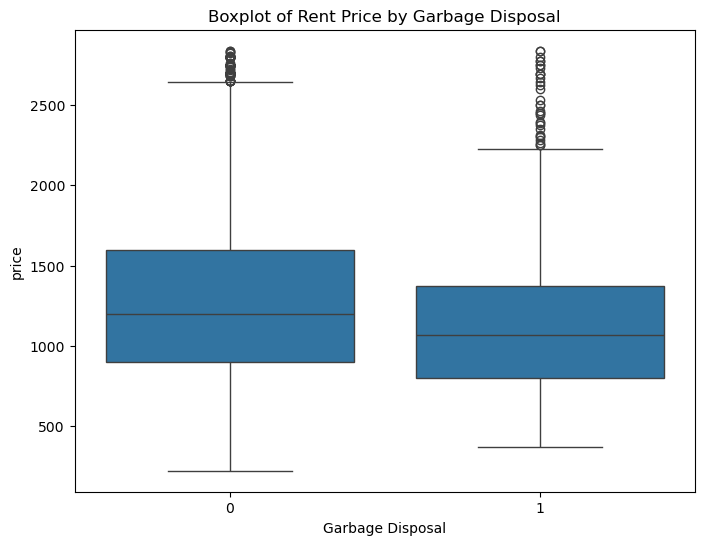

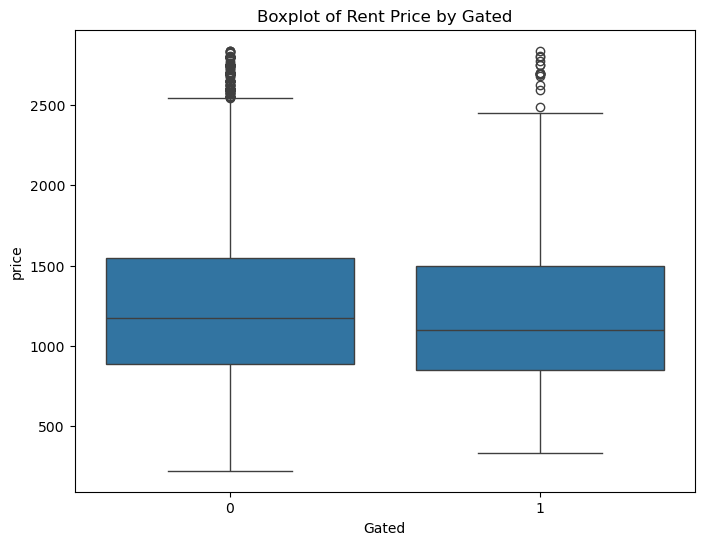

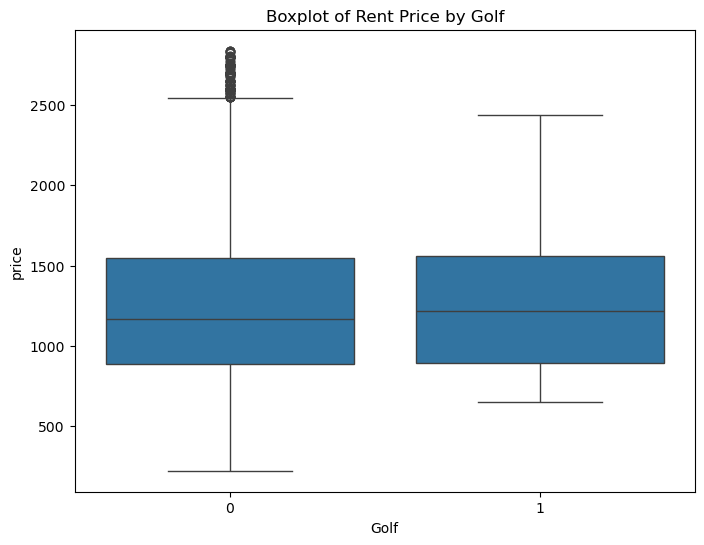

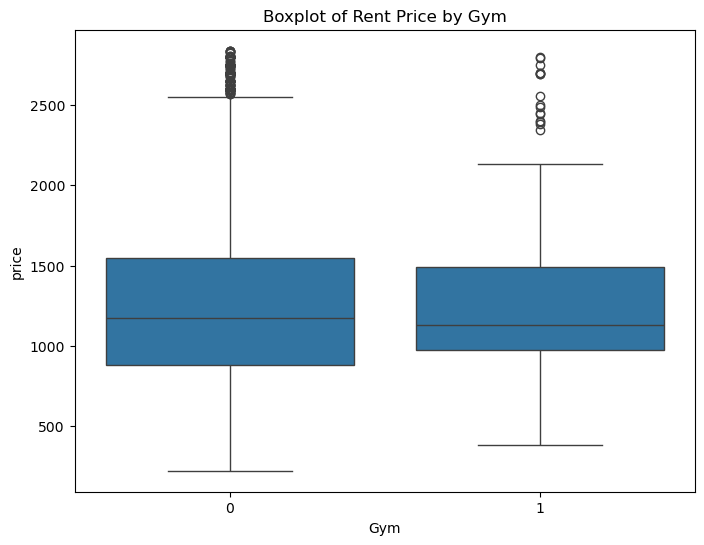

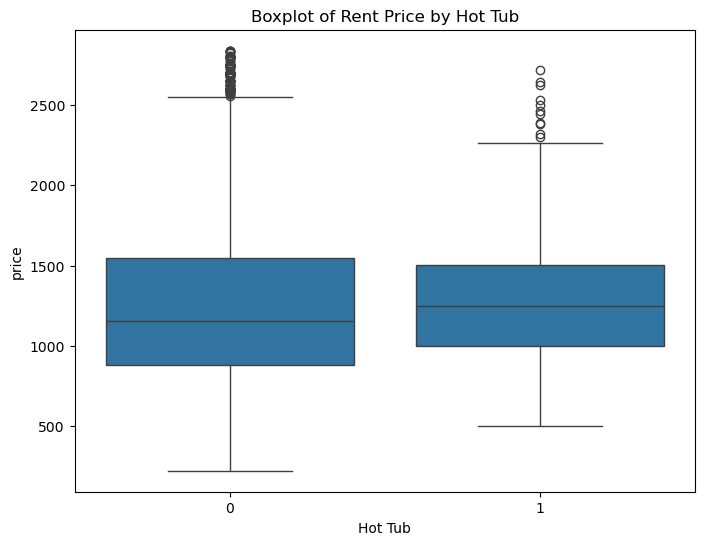

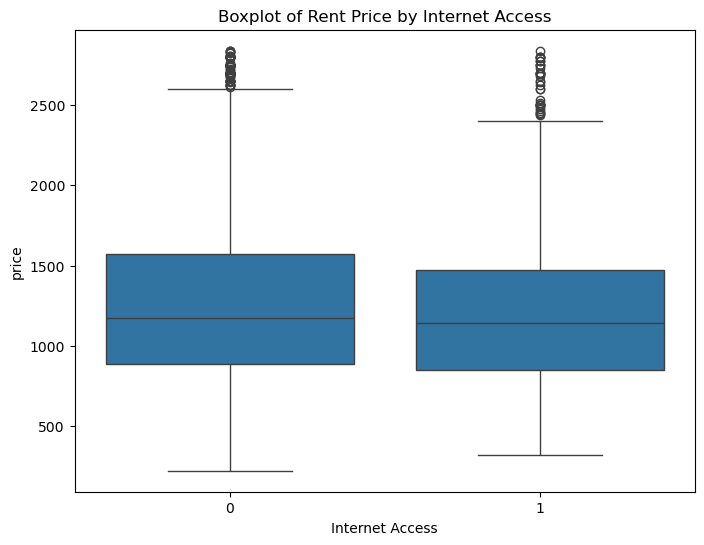

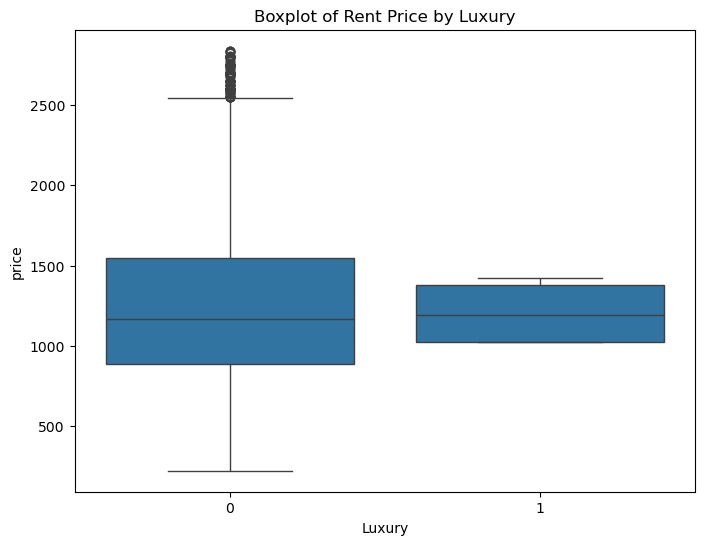

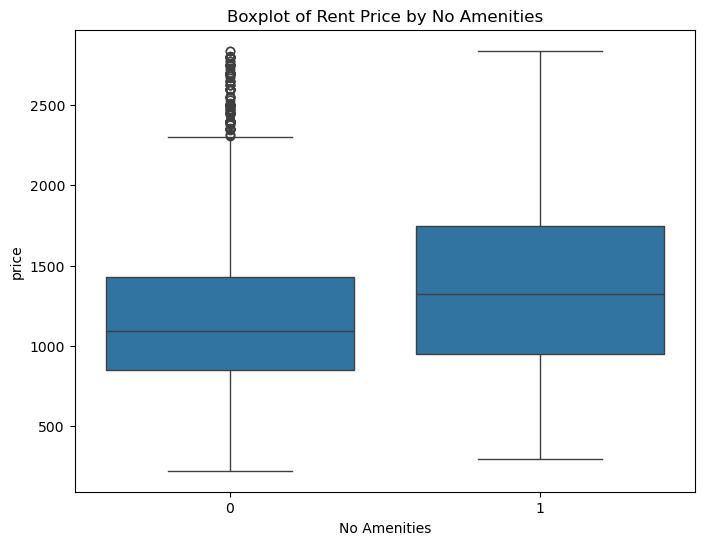

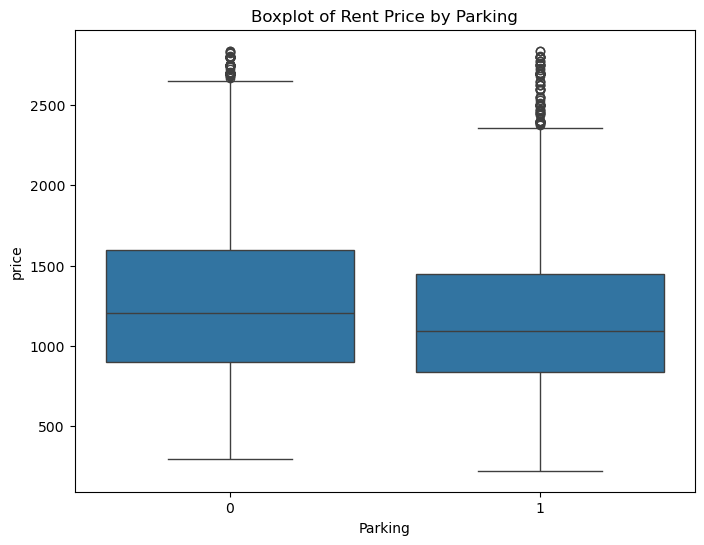

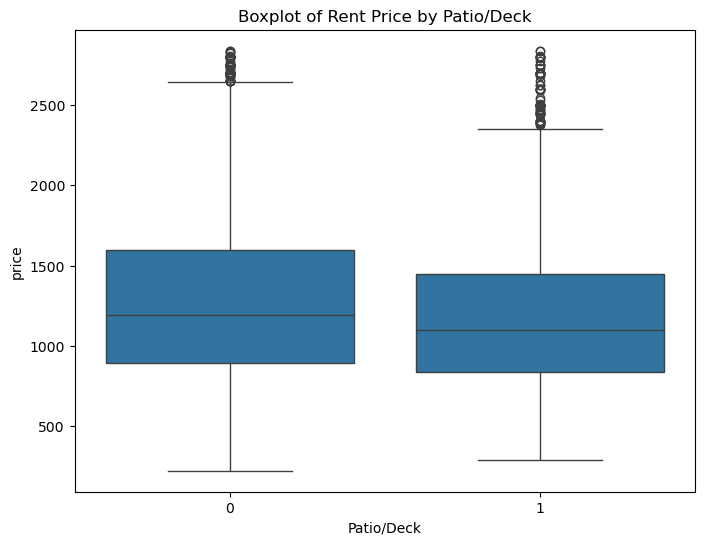

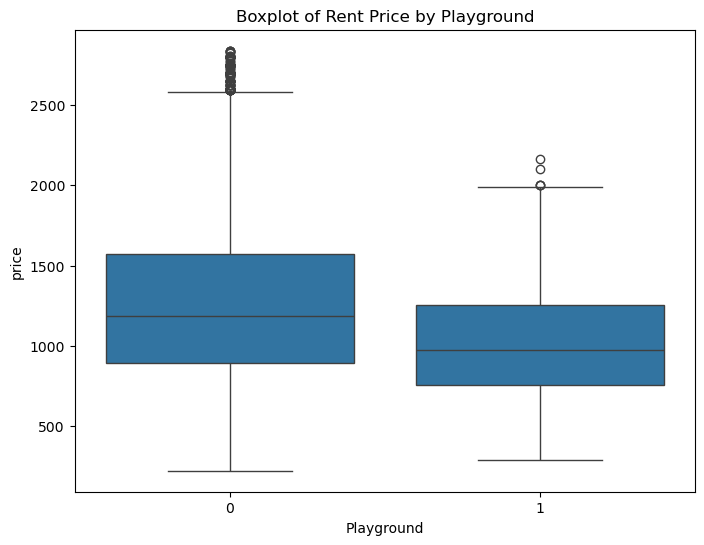

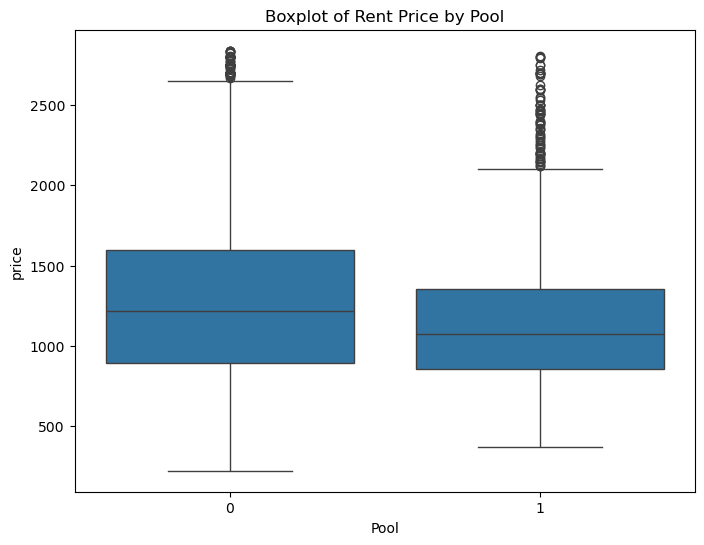

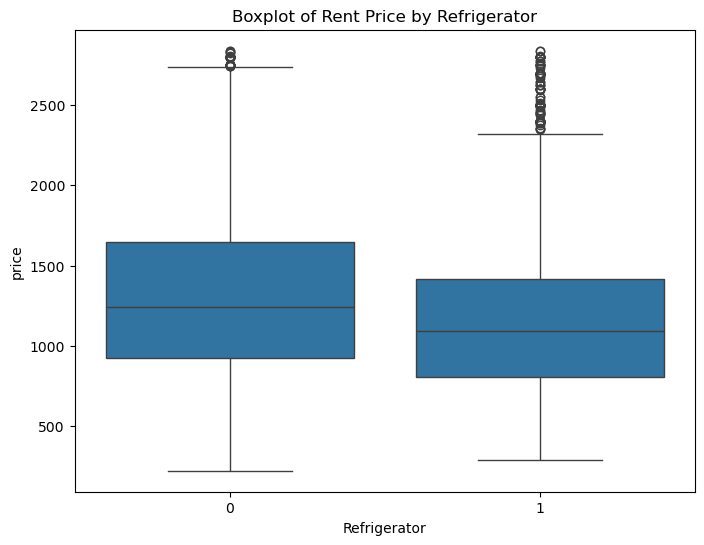

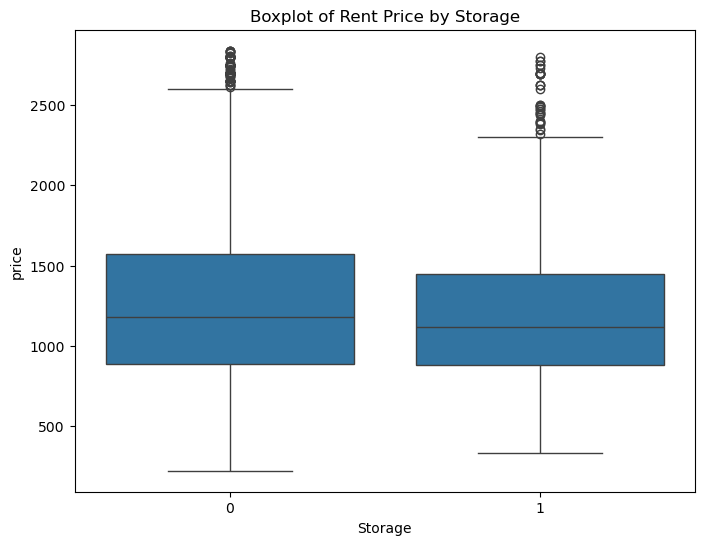

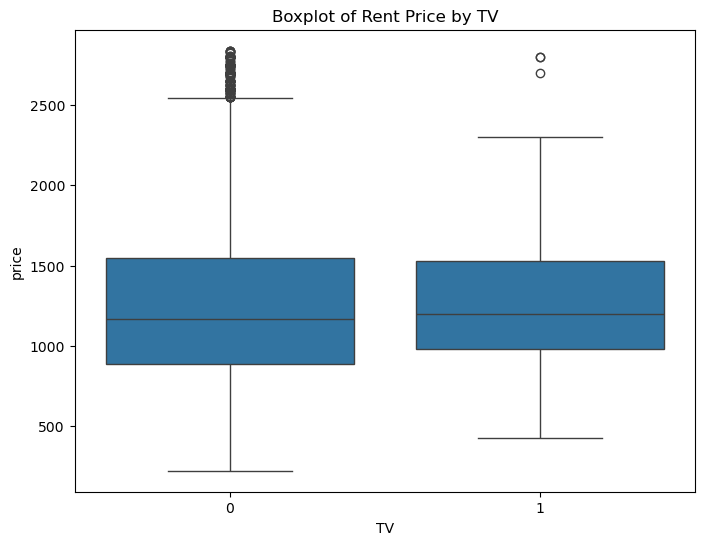

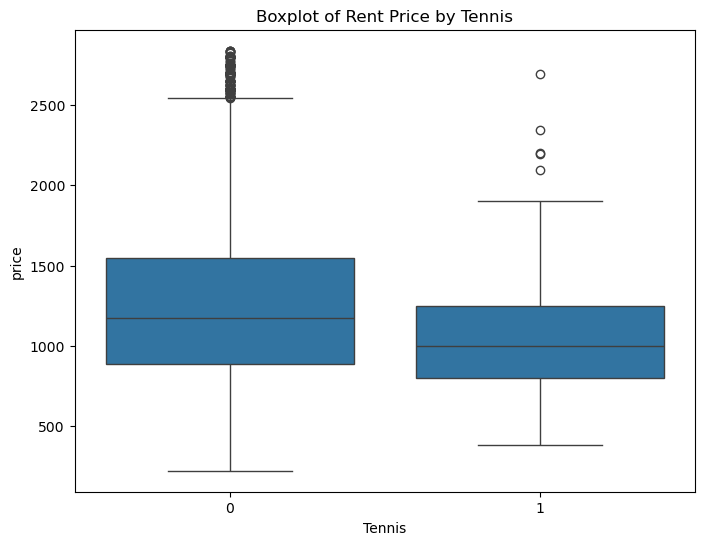

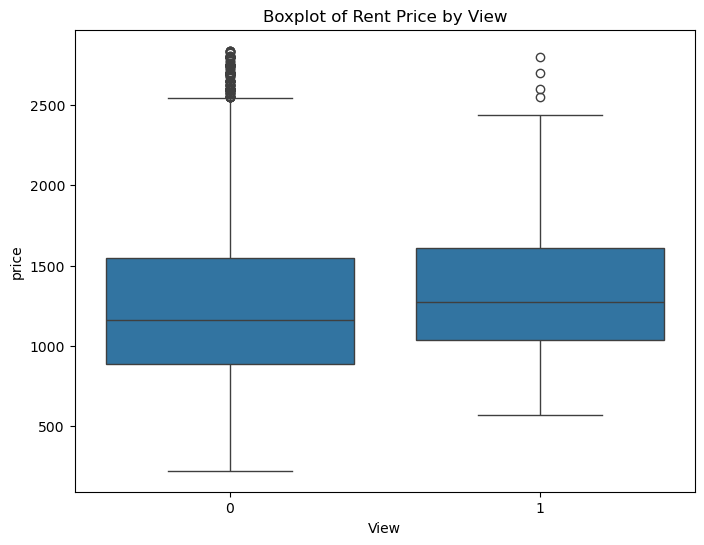

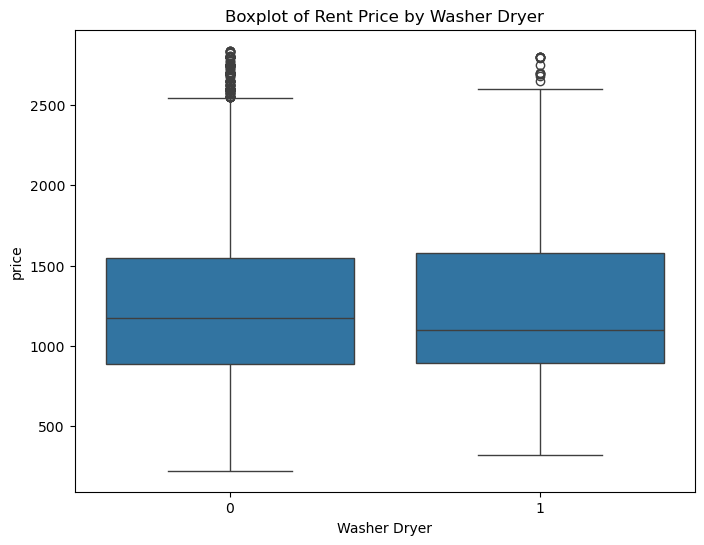

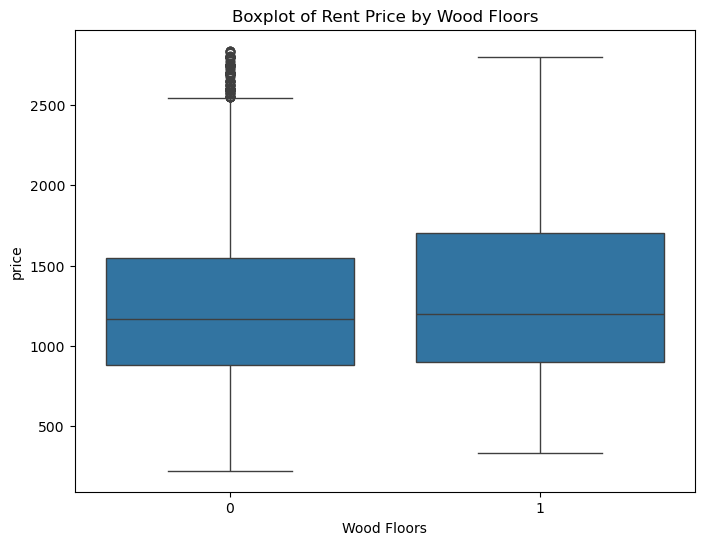

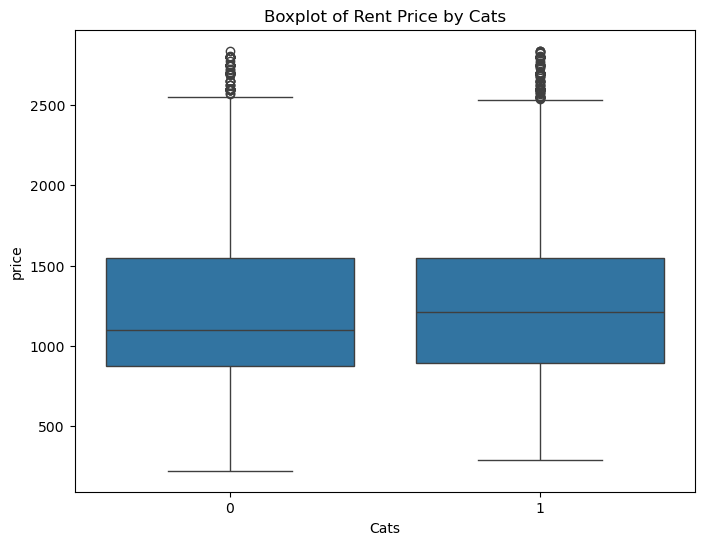

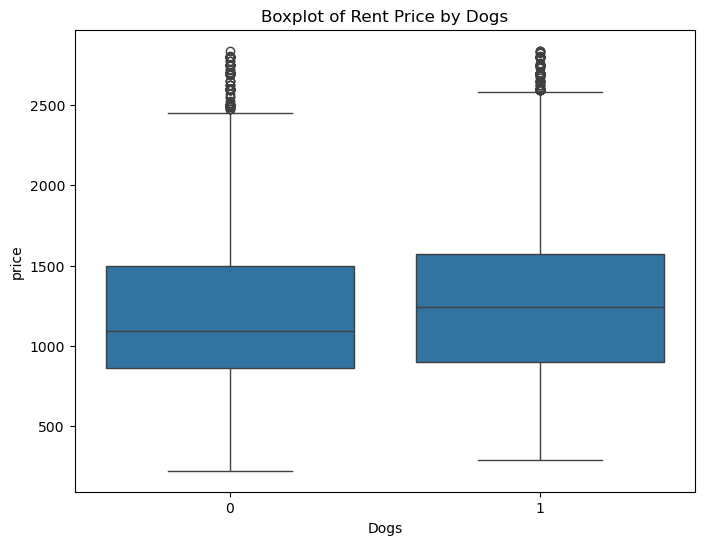

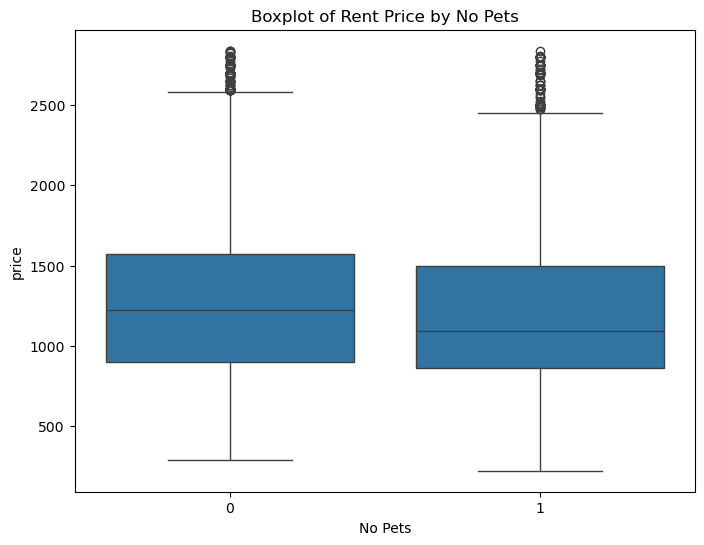

In [27]:
cols_to_plot = [col for col in combo.columns if col not in ['price', 'id', 'title','body','currency','price_display','address','latitude','longitude']]

for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='price', data=combo)
    plt.title(f'Boxplot of Rent Price by {col}')
    plt.show()

1. Apartment-type property has the highest average price compared to the other property types. The writer thinks that this is normal because the data has more information about apartments compared to the other property type.
2. The higher the number of bathrooms, the higher the average rent price.
3. The higher the number of bedrooms, the higher the average rent price tends to be.
4. If the property has no additional fees, the average rent price is higher.
5. If the property listing has a thumbnail photo, the average rent price is higher.
6. The larger the property (in square feet), the higher the average rent price.
7. No visible pattern in how the city names the property where it is located affects the average rent price.
8. No visible pattern in how the state the property is located affects the average rent price.
9. No visible pattern in which website the property is listed affects the average rent price.
10. No visible pattern exists in when the property is listed that affects the average rent price.
11. The average rent price tends to be higher when there is no AC.
12. The average rent price tends to be higher when there is no alarm.
13. The average rent price tends to be higher when there is no basketball court.
14. The average rent price tends to be higher when there is no Cable or Satellite.
15. The average rent price tends to be higher when there is no Clubhouse.
16. The average rent price tends to be higher when there is no Dishwasher.
17. The average rent price tends to be higher when there is a Doorman.
18. The average rent price tends to be higher when there is an Elevator.
19. The rent price tends to be higher when there is no Fireplace.
20. The average rent price tends to be higher when there is no Garbage Disposal.
21. The average rent price tends to be higher when there is no gating.
22. The average rent price tends to be higher when there is a Golf Club.
23. The average rent price tends to be higher when there is no Gym.
24. The average rent price tends to be higher when there is a Hot Tub.
25. The average rent price tends to be higher when there is no Internet Access.
26. The average rent price tends to be higher when there is a Luxury hub.
27. The average rent price tends to be higher when there are no Amenities.
28. The average rent price tends to be higher when there is no Parking.
29. The average rent price tends to be higher when there is no Patio/Deck.
30. The average rent price tends to be higher when there is no Playground.
31. The average rent price tends to be higher when there is no Pool.
32. The average rent price tends to be higher when there is no Refrigerator.
33. The average rent price tends to be higher when there is no Storage.
34. The average rent price tends to be higher when there is no TV.
35. The average rent price tends to be higher when there is no Tennis field.
36. The average rent price tends to be higher when there is a certain View.
37. The average rent price tends to be higher when there is no Washer/Dryer.
38. The average rent price tends to be higher when the floor is Wood.
39. The average rent price tends to be higher when pets are allowed, specifically Cats.
40. The average rent price tends to be higher when pets are allowed, specifically Dogs.
41. The average rent price tends to be higher when there are no pets allowed.

## Correlation Plot

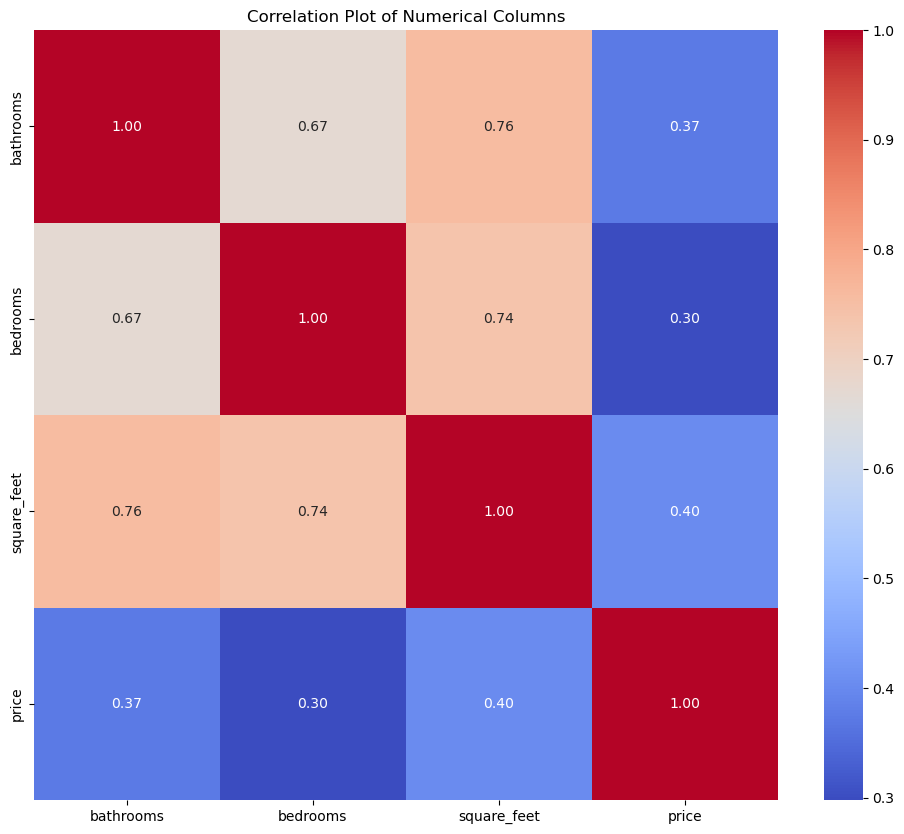

In [28]:
# Select numerical columns
num_cols = ['bathrooms','bedrooms', 'square_feet','price']

# Compute correlation matrix
corr = combo[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Plot of Numerical Columns')
plt.show()

There are moderate - high correlation between the number of bedrooms, bathrooms, against the square feet and low-moderate correlation between price and square feet, number of bathrooms, and number of bedrooms.

# Feature Engineering

## Split Train and Test

In [29]:
X = combo.drop(['price', 'id', 'title','body','currency','price_display','address','latitude','longitude','price_type','time'], axis=1)
y = combo['price']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)

## Feature Selection

In [31]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train[['bedrooms','bathrooms','square_feet']])

vif_high = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_high.columns = ['feature','vif_score']
vif_high = vif_high.loc[vif_high.feature!='const']
vif_high

,feature,vif_score
1,bedrooms,2.334615
2,bathrooms,2.559993
3,square_feet,3.059600


based on the VIF score, the suspected correlated features have moderate correlation, hence it is considered okay not to remove anything.

## Mean Encoding

In [32]:
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
rare_encoder = RareLabelEncoder(
    tol=0.01,  # <1% frequency → 'Rare'
    variables=['category','has_photo','cityname','state','source']
)
rare_encoder.fit(X_train)
X_train_rare = rare_encoder.transform(X_train)
X_test_rare = rare_encoder.transform(X_test)

mean_encoder = MeanEncoder(variables=['category','has_photo','cityname','state','source'])
mean_encoder.fit(X_train_rare, y_train)

X_train= mean_encoder.transform(X_train_rare)
X_test = mean_encoder.transform(X_test_rare)

overall_mean = y_train.mean()
categorical_vars = ['category','has_photo','cityname','state','source']
for var in categorical_vars:
    if X_test[var].isnull().any():
        null_count = X_test[var].isnull().sum()
        X_test[var].fillna(overall_mean, inplace=True)
        print(f"Filled {null_count} unknown categories in {var} with overall mean")

Filled 1 unknown categories in category with overall mean


/opt/anaconda3/lib/python3.12/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable category is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable has_photo is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) category.
  warnings.warn(


## Ordinal Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ord_encode = ['fee']
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = ord_encoder.fit_transform(X_train[ord_encode])
X_train[ord_encode] = pd.DataFrame(X_train_encoded, columns=ord_encode, index=X_train.index)

In [34]:
X_test_encoded = ord_encoder.transform(X_test[ord_encode])
X_test[ord_encode] = pd.DataFrame(X_test_encoded, columns=ord_encode, index=X_test.index)

## MinMax Scaling

In [35]:
# min-max scaler based on training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaler = scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# Modelling Machine Learning

## Linear Regression

### Fitting

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
import pandas as pd

# Assuming X_train is a DataFrame with feature columns
feature_names = X_train.columns
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df

,Feature,Coefficient
0,category,0.386175
1,bathrooms,99.795641
2,bedrooms,27.962648
3,fee,-57.759142
4,has_photo,0.358946
5,square_feet,0.359585
6,cityname,0.231192
7,state,0.972637
8,source,0.670962
9,AC,-220.862383


### Diagnostic

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


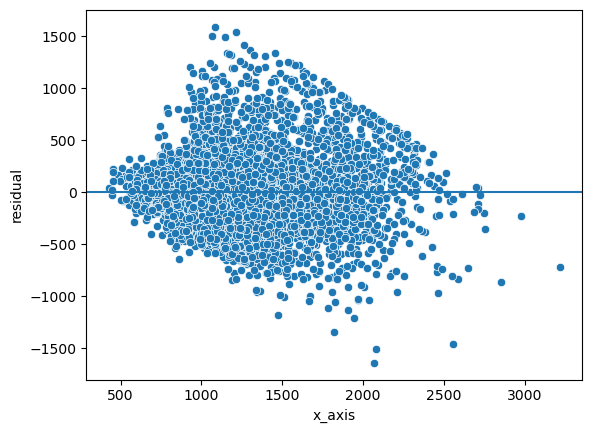

In [38]:
# calculate residuals
y_predict_train = model.predict(X_train)
residual = y_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


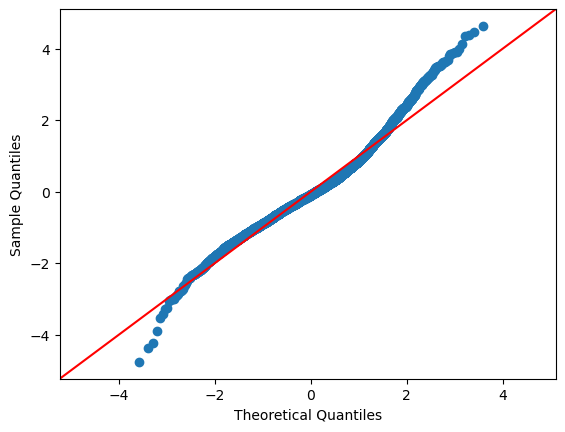

In [39]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.values.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

The residual plot shows that there is systemic downward pattern, this means that there is an opportunity to explore non-linear regression. The Q-Q plot shows a relatively normal distribution with slight deviations, but considered okay.

### Cross Validation

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.507404  269.943665  362.247203
1        0.587404  251.865166  336.716744
2        0.566883  255.751252  340.161394
3        0.503950  258.095055  349.149918
4        0.551814  255.729592  343.753793
Average  0.543491  258.276946  346.405810


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### Evaluation

In [41]:
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [42]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [43]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.5113684455544603
MAE: 259.4604331944361
RMSE: 345.5811165251588
MAPE: 22.52%


the linear regression model performs well because no bias or no overfitting because it is seen that the prediction result is better enough than the cross validation result.

However, it is known that the linear model will deviates at around 1.1 and 0.77 point based on RMSE and MAE, and this deviation is 6.65% from the actual value. This deviation is pretty high, we will try to improve the linear model with Ridge regularization because all features are considered important.

## Linear Regression with Ridge

Linear regression with Ridge is done to make sure no feature are penalized to 0 because every feature in the data is considered important.

### Fitting

In [44]:
# split train test
from sklearn.model_selection import train_test_split

# splitting: train and validation
X_potrain, X_validation, y_potrain, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [45]:
from sklearn.linear_model import Ridge

# train the model
X_potrain_np = X_potrain.to_numpy()
y_potrain_np = y_potrain.to_numpy()
y_potrain_np = y_potrain_np.reshape(len(y_potrain_np),)

# define the model
# 4 models with 4 different lambdas or alphas
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_hund = Ridge(alpha=100, random_state=42)
ridge_reg_tho = Ridge(alpha=1000, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_potrain_np, y_potrain_np)
ridge_reg_pointone.fit(X_potrain_np, y_potrain_np)
ridge_reg_one.fit(X_potrain_np, y_potrain_np)
ridge_reg_ten.fit(X_potrain_np, y_potrain_np)
ridge_reg_hund.fit(X_potrain_np, y_potrain_np)
ridge_reg_tho.fit(X_potrain_np, y_potrain_np)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

Ridge(alpha=1000, random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1., 10,100,1000]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten,
          ridge_reg_hund,
          ridge_reg_tho]

X_validation_np = X_validation.to_numpy()

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation_np)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 351.09961444042494
RMSE of Ridge regression model with alpha = 0.1 is 351.09197830639226
RMSE of Ridge regression model with alpha = 1.0 is 351.0199085953409
RMSE of Ridge regression model with alpha = 10 is 350.5542977274145
RMSE of Ridge regression model with alpha = 100 is 350.48061423245343
RMSE of Ridge regression model with alpha = 1000 is 357.42635521536135


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Based on the RMSE, Ridge regression with lamda 100 is the most optimum.

In [47]:
ridge_best = ridge_reg_hund

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_potrain.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-2815.985758
1,category,0.437575
2,bathrooms,79.343514
3,bedrooms,30.177931
4,fee,-12.881182
5,has_photo,0.406799
6,square_feet,0.372963
7,cityname,0.238554
8,state,0.980595
9,source,0.768108


### Diagnostic

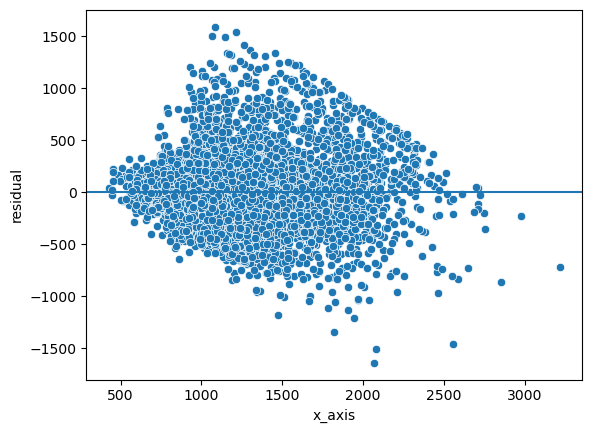

In [48]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


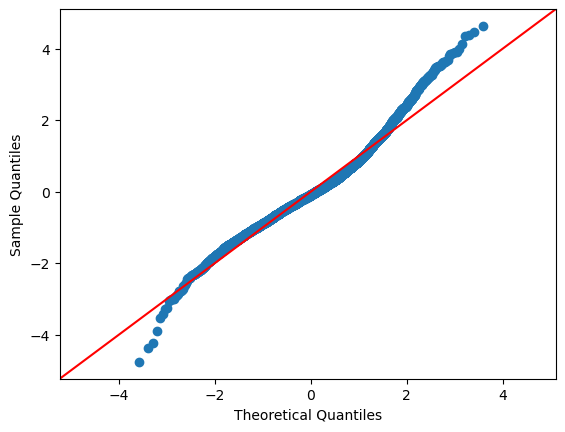

In [49]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.values.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

The residual plot shows that the linear model with Ridge fits well because there are no systemic or curvature shape, while the QQ Plot shows that that the error is normally distributed also shows linear fits well.

### Cross Validation

In [50]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(ridge_best, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.506740  270.808621  362.491310
1        0.582206  252.580663  338.830923
2        0.569060  255.877566  339.305594
3        0.496708  258.888761  351.689601
4        0.549790  255.763077  344.529241
Average  0.540901  258.783738  347.369334


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWar

In [51]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_potrain_np)

print('R-squared for training data is {}'.format(r2_score(y_potrain, y_predict_train)))

R-squared for training data is 0.5523104209863308


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### Evaluation

In [52]:
X_test_np = X_test.to_numpy()
y_pred = model.predict(X_test_np)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [53]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [54]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.4832328629470083
MAE: 265.6619521728657
RMSE: 355.39121873129915
MAPE: 23.30%


The use of regularized linear regression with ridge at alpha = 100 shows a higher MAE, RMSE, and MAPE. This means that the linear regression with ridge model is less effective than traditional linear regression, this means that traditional linear regression performs better.

## Decision Tree

### Fitting

In [55]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

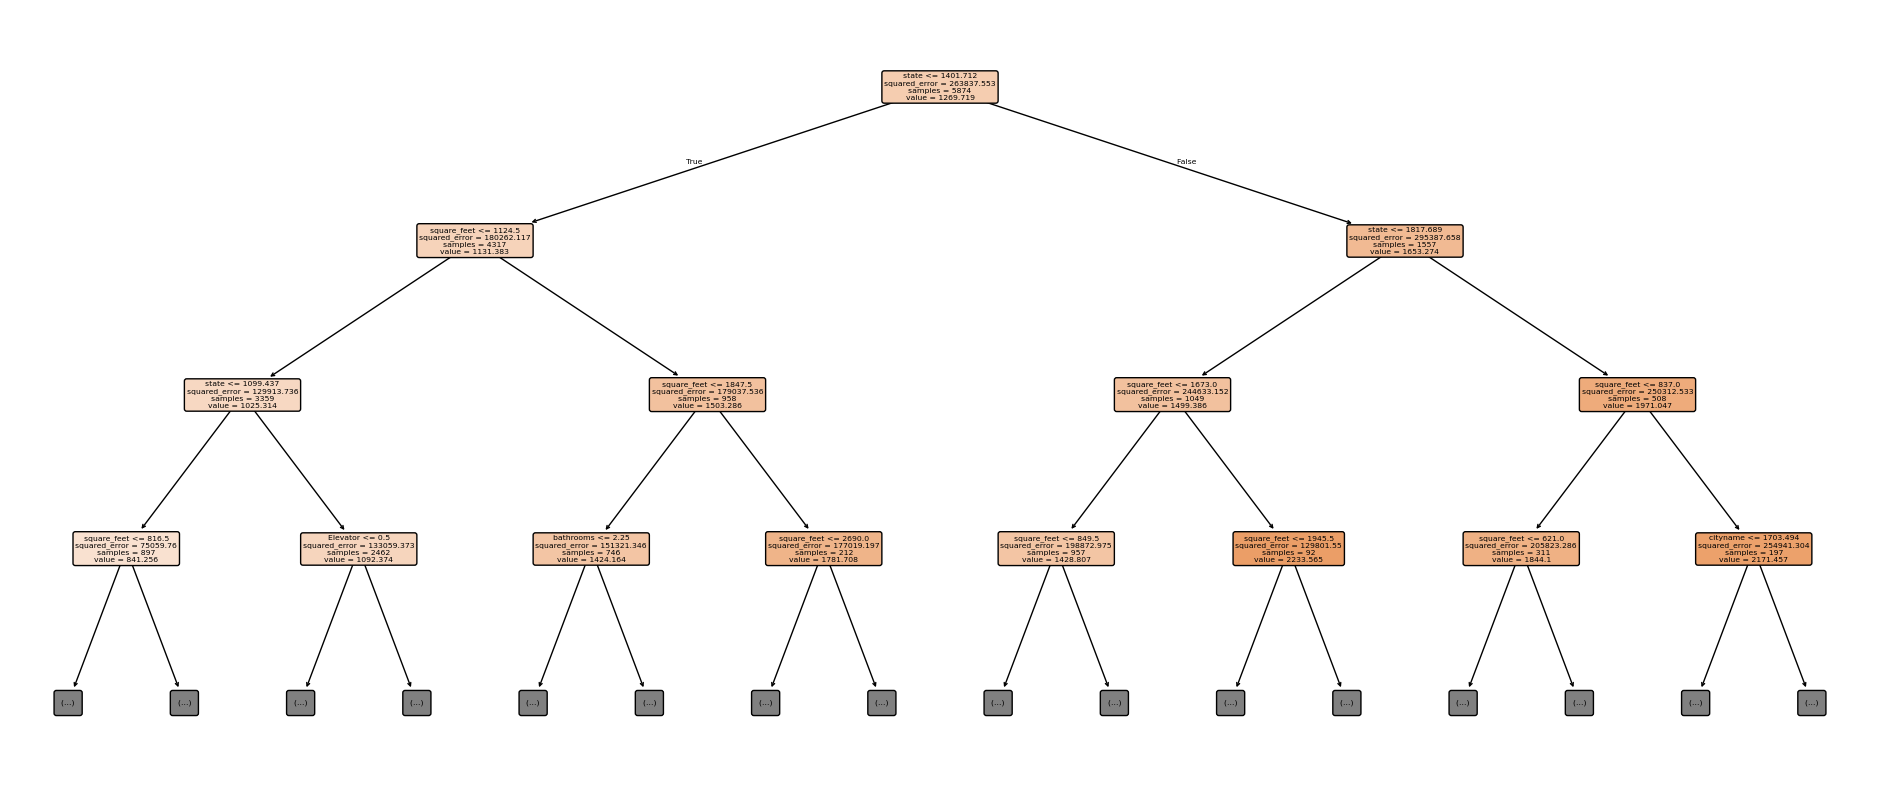

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3        # display only top levels so it fits on screen
)
plt.show()

In [57]:
imp = pd.Series(dt.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False).head(10)

state           0.344191
square_feet     0.335620
cityname        0.041329
source          0.034663
bedrooms        0.033675
bathrooms       0.026779
Elevator        0.017154
No Amenities    0.012440
Pool            0.012253
Dogs            0.011480
dtype: float64

### Cross Validation

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.253341  316.558875  445.985479
1        0.325859  306.751915  430.405172
2        0.204270  328.750476  461.068546
3        0.169834  314.681773  451.681078
4        0.252552  312.200233  443.924379
Average  0.241171  315.788654  446.612931


### Evaluation

In [59]:
y_pred = dt.predict(X_test)

In [60]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [61]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.2684094752857681
MAE: 294.58690719310187
RMSE: 422.85676691030557
MAPE: 25.18%


## Decision Tree Pruned

### Fitting

In [62]:
# Get the effective alphas
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f"Number of alpha values: {len(ccp_alphas)}")
print(f"Alpha range: {ccp_alphas[0]:.6f} to {ccp_alphas[-1]:.6f}")

Number of alpha values: 4450
Alpha range: 0.000000 to 53059.523813


In [63]:
# Train a tree for each alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(f"Trained {len(clfs)} different trees")

Trained 4450 different trees


In [64]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores for each alpha
cv_scores = []
train_scores = []

for clf in clfs:
    # 5-fold cross-validation on training data
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(cv_score.mean())
    
    # Training score
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)

print("Sample of CV scores:", cv_scores[:5])

Sample of CV scores: [np.float64(-446.6129309126603), np.float64(-446.6129309126603), np.float64(-446.6129278106052), np.float64(-446.6129278106052), np.float64(-446.6129278106052)]


In [65]:
# Find the alpha with highest cross-validation RMSE
best_alpha_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_alpha_idx]
best_cv_score = cv_scores[best_alpha_idx]

print(f"Best alpha: {best_alpha:.6f}")
print(f"Best CV RMSE: {best_cv_score:.3f}")
print(f"Training RMSE at best alpha: {train_scores[best_alpha_idx]:.3f}")

Best alpha: 290.297187
Best CV RMSE: -361.841
Training RMSE at best alpha: 0.601


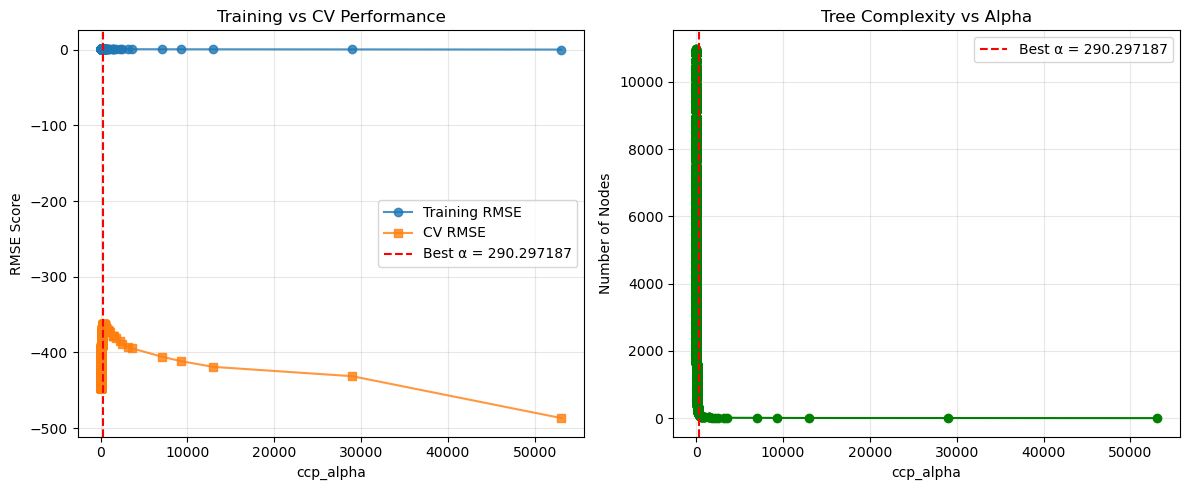

In [66]:
# Plot training vs validation performance
plt.figure(figsize=(12, 5))

# Left plot: Performance vs Alpha
plt.subplot(1, 2, 1)
plt.plot(ccp_alphas, train_scores, marker='o', label='Training RMSE', alpha=0.8)
plt.plot(ccp_alphas, cv_scores, marker='s', label='CV RMSE', alpha=0.8)
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.6f}')
plt.xlabel('ccp_alpha')
plt.ylabel('RMSE Score')
plt.title('Training vs CV Performance')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Number of nodes vs Alpha
node_counts = [clf.tree_.node_count for clf in clfs]
plt.subplot(1, 2, 2)
plt.plot(ccp_alphas, node_counts, marker='o', color='green')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.6f}')
plt.xlabel('ccp_alpha')
plt.ylabel('Number of Nodes')
plt.title('Tree Complexity vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [67]:
# Train the final model with the best alpha
final_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(290.29718671219973), random_state=42)

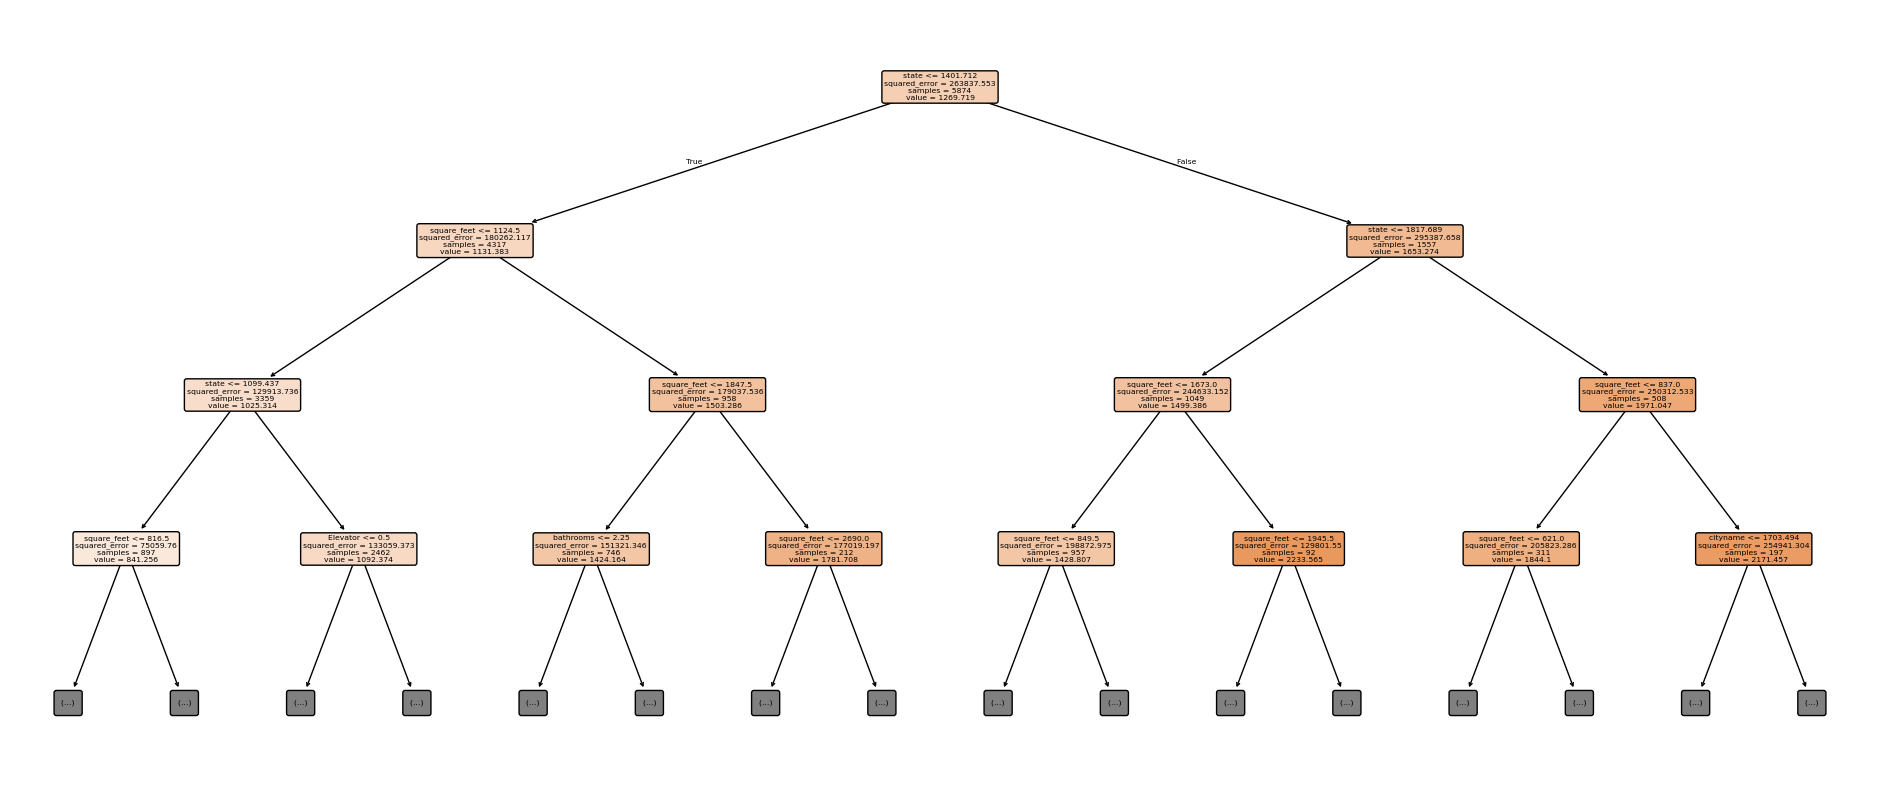

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 10))
plot_tree(
    final_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3        # display only top levels so it fits on screen
)
plt.show()

In [69]:
# Compare feature importance between pruned and unpruned
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Unpruned': dt.feature_importances_,
    'Pruned': final_tree.feature_importances_
}).sort_values('Pruned', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))


Top 10 Most Important Features:
            Feature  Unpruned    Pruned
7             state  0.344191  0.483404
5       square_feet  0.335620  0.347770
6          cityname  0.041329  0.043690
8            source  0.034663  0.030748
16         Elevator  0.017154  0.023224
1         bathrooms  0.026779  0.015378
25     No Amenities  0.012440  0.009013
29             Pool  0.012253  0.008221
2          bedrooms  0.033675  0.008148
23  Internet Access  0.010911  0.006942


### Cross Validation

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(final_tree, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.471095  273.764889  375.360473
1        0.564069  256.897986  346.107466
2        0.540400  262.730093  350.406734
3        0.455617  263.438246  365.764609
4        0.476358  268.304369  371.565691
Average  0.501508  265.027116  361.840995


### Evaluation

In [71]:
# Evaluate on test set
y_pred = final_tree.predict(X_test)

In [72]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [73]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.4876072377325892
MAE: 260.71504010436763
RMSE: 353.8838489884447
MAPE: 22.74%


## Random Forest

### Fitting

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [75]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

### Cross Validation

In [76]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.553246  249.374189  344.979848
1        0.616756  234.824435  324.518757
2        0.614737  233.287238  320.819731
3        0.559908  231.160936  328.867815
4        0.600745  231.072385  324.446895
Average  0.589078  235.943837  328.726609


### Evaluation

In [77]:
# Evaluate on test set
y_pred = rf.predict(X_test)

In [78]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [79]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.5762376994413148
MAE: 230.89451589384691
RMSE: 321.82546672235446
MAPE: 20.03%


### Explainer

In [80]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(rf)
shap_explanation = explainer(X_test)
shap_values = explainer.shap_values(X_test)

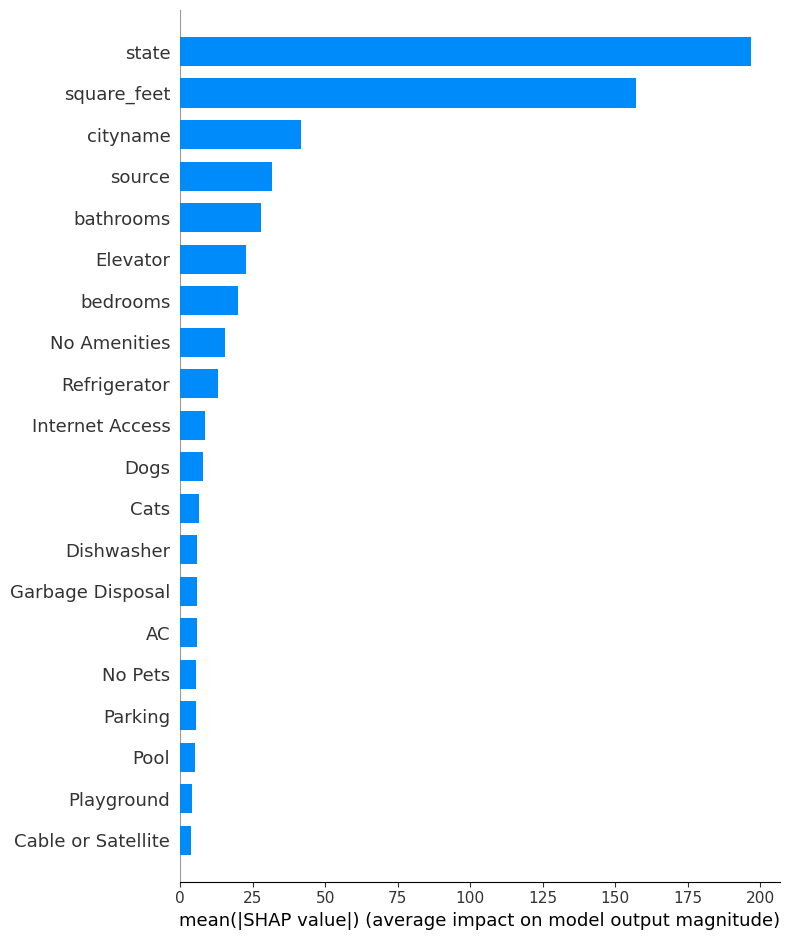

In [81]:
# Summary plot showing feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


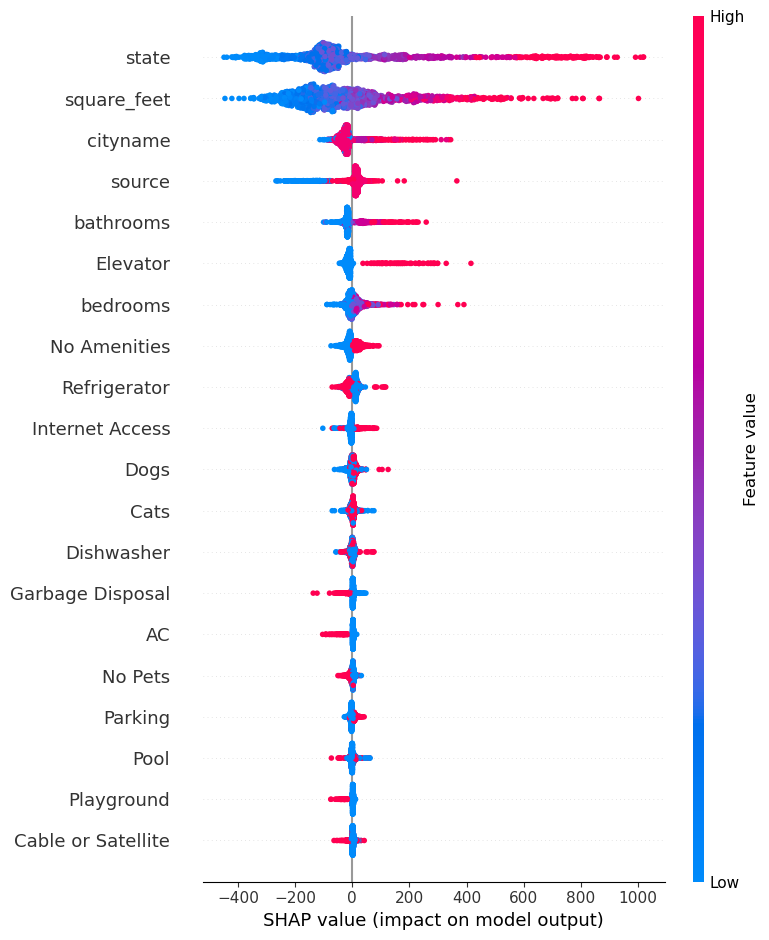

In [82]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_values, X_test)

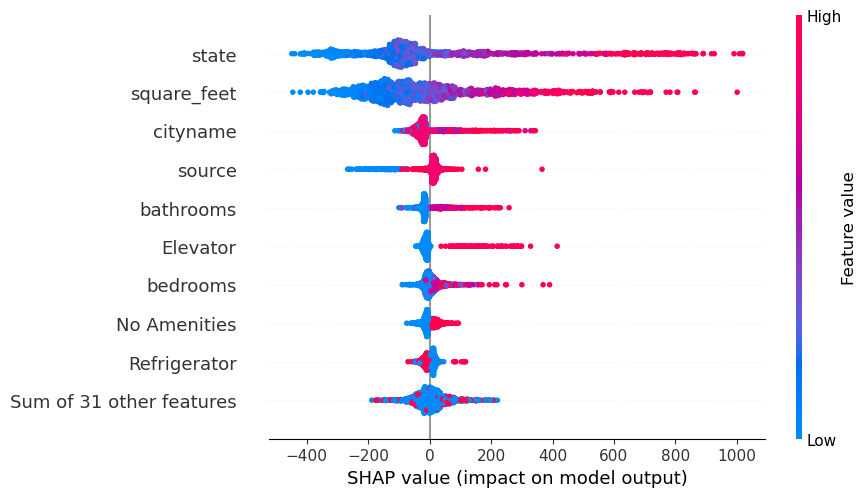

In [83]:
shap.plots.beeswarm(shap_explanation)

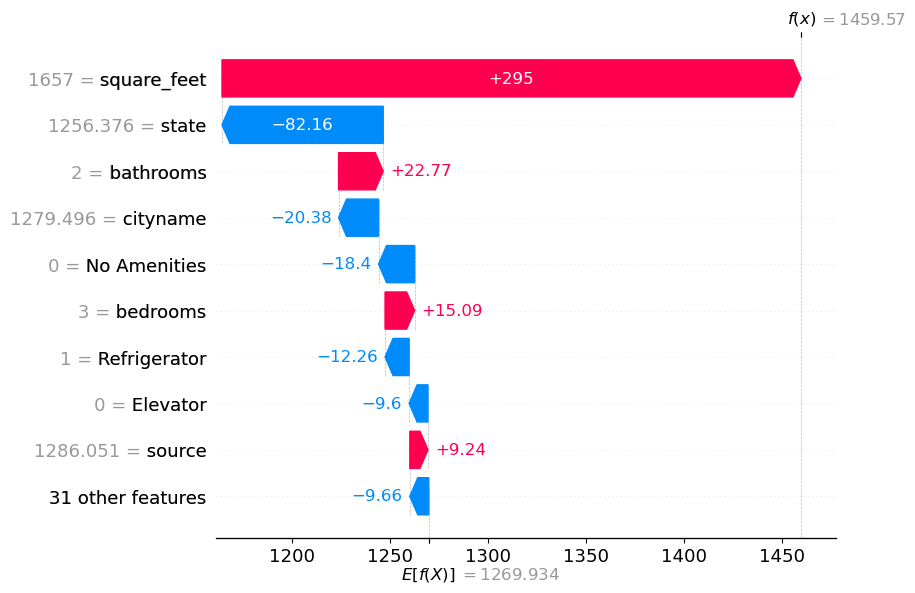

In [84]:
shap.plots.waterfall(shap_explanation[0])

Random Forest Regressor (traditional) shows slightly better Test RMSE and MAPE than the currently performing model (Traditional Linear Regression when this was written - 17 Jul). Based on the explainer, the most significant features are G2, age, and absences, with breakdown below:
1. The better the G2, the better the G3 result
2. The lower the number of absences, the better the G3 result
3. The older the student, the lower the G3 result.

## Random Forest w/ Hyper Parameter Tuning

### Fitting

In [ ]:
# Define parameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with RMSE scoring
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_:.3f}")

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE: 322.959


### Cross Validation

In [86]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_rf, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.563274  247.707799  341.086166
1        0.632889  230.977758  317.614621
2        0.634287  231.037603  312.573949
3        0.574641  229.339600  323.316072
4        0.611121  228.664398  320.203161
Average  0.603243  233.545431  322.958794


### Evaluation

In [87]:
# Evaluate on test set
y_pred = best_rf.predict(X_test)

In [88]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [89]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.5849973804639038
MAE: 228.66779174053838
RMSE: 318.48183578509696
MAPE: 19.74%


### Explainer

In [90]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(best_rf)
shap_explanation = explainer(X_test)
shap_values = explainer.shap_values(X_test)

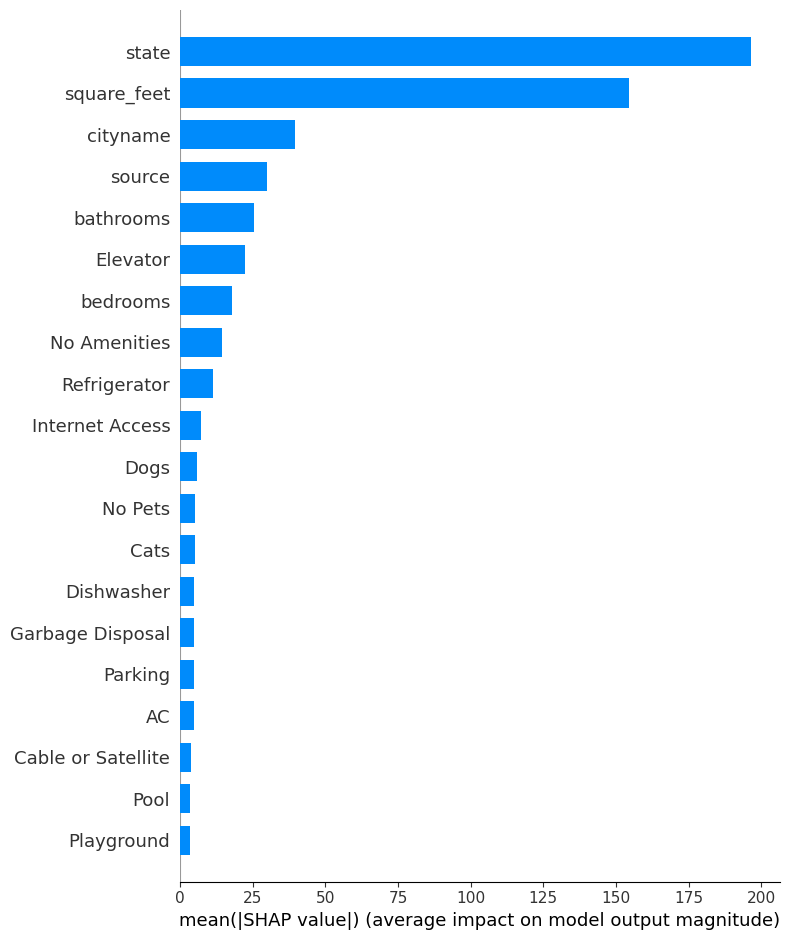

In [91]:
# Summary plot showing feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


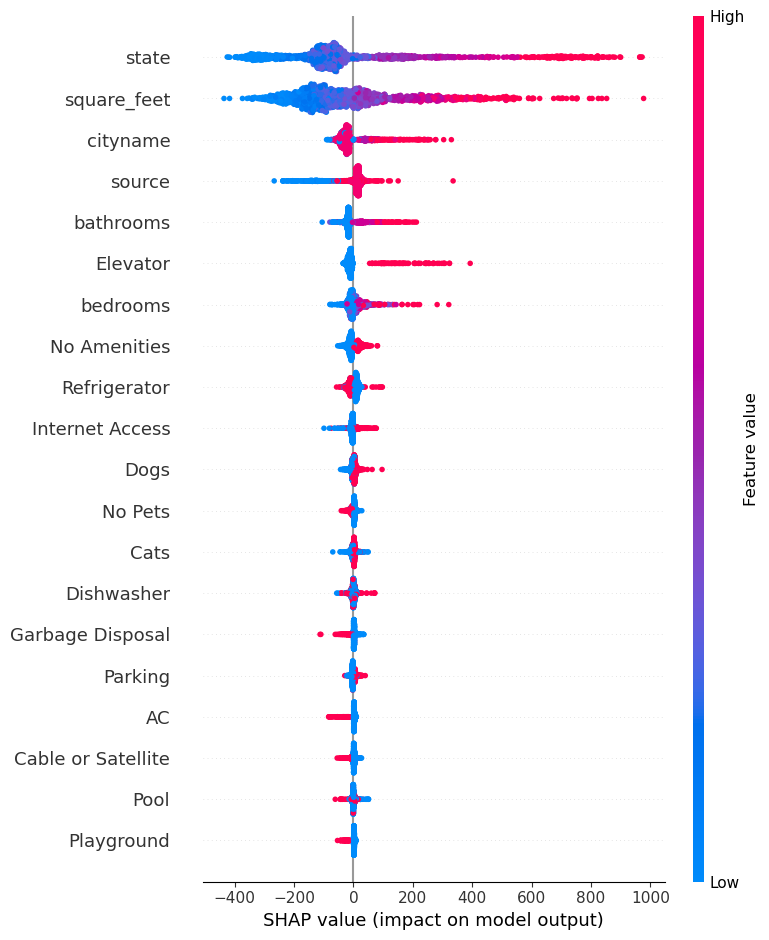

In [92]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_values, X_test)

## XGBoost with Hyperparameter Tuning

### Fitting

In [93]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)

In [94]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    xgboost, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [95]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=Non...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000, 1500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [96]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Use best model
best_xgboost = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.8}
Best CV Score: -97039.29378373218


### Cross Validation

In [97]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_xgboost, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.585753  239.398267  332.192208
1        0.660588  222.050771  305.397818
2        0.660673  220.782740  301.086697
3        0.606257  220.841684  311.068363
4        0.642867  217.101849  306.855427
Average  0.631227  224.035062  311.320103


### Evaluation

In [98]:
# Evaluate on test set
y_pred = best_xgboost.predict(X_test)

In [99]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [100]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.6140109611527216
MAE: 221.07043997165377
RMSE: 307.1473232754084
MAPE: 19.26%


### Explainer

In [101]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(best_xgboost)
shap_explanation = explainer(X_test)
shap_values = explainer.shap_values(X_test)

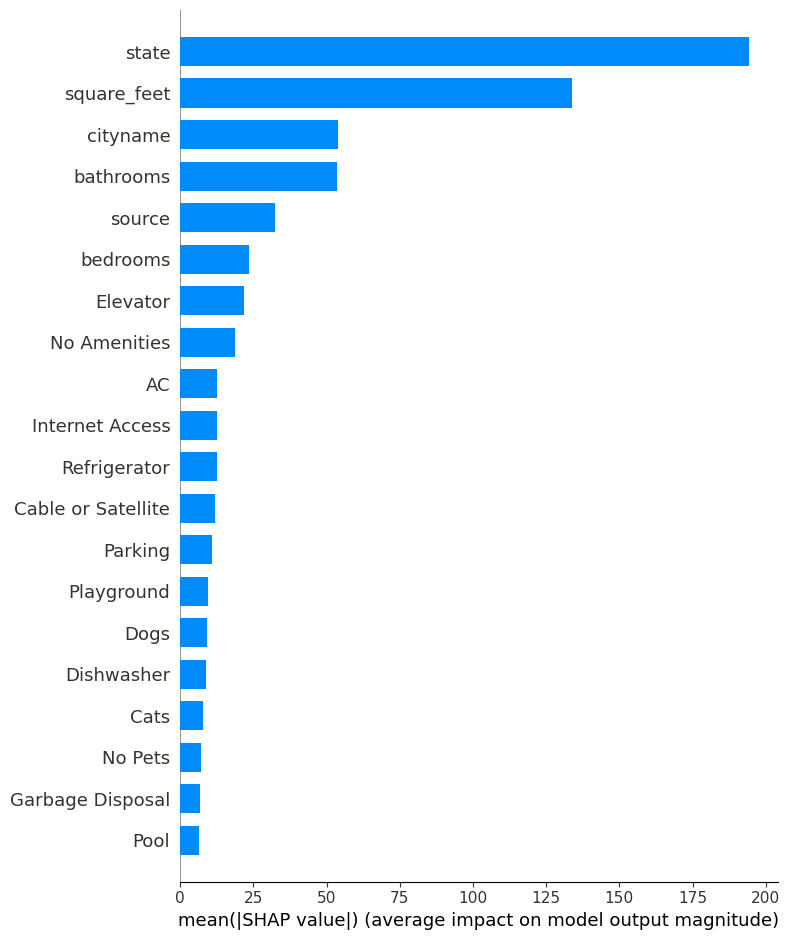

In [102]:
# Summary plot showing feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


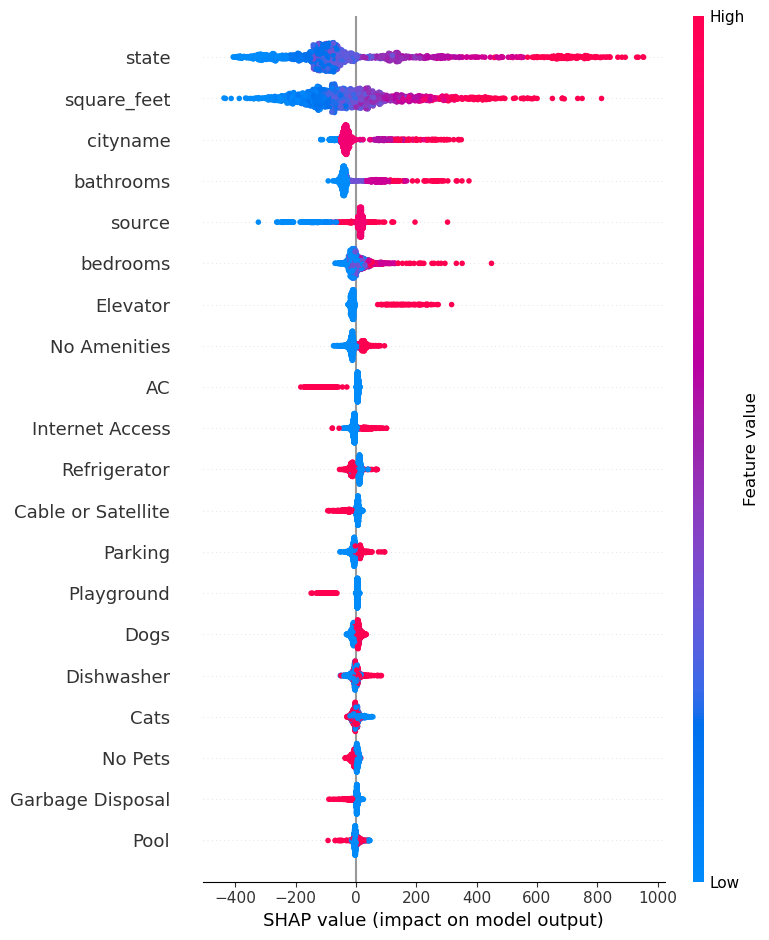

In [103]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_values, X_test)

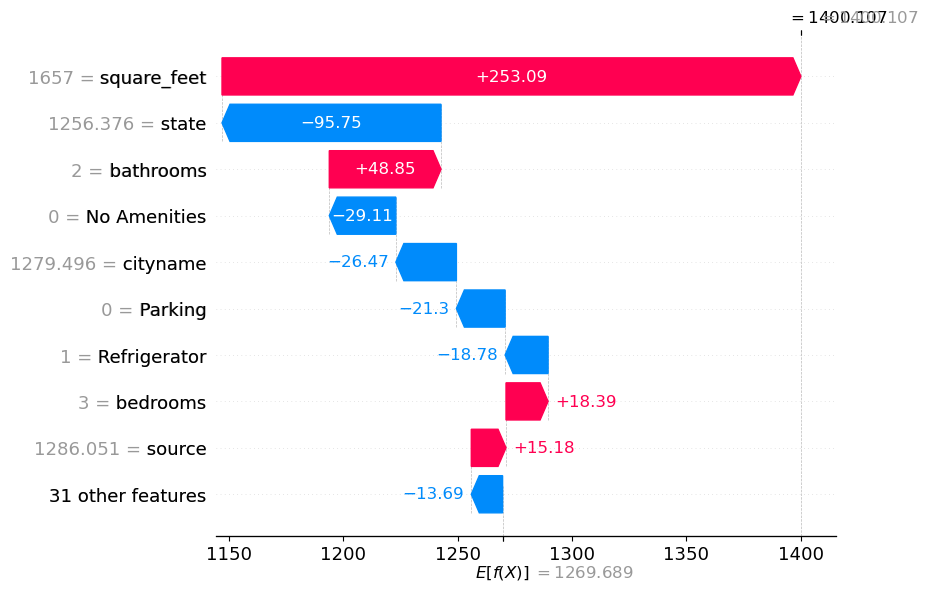

In [104]:
shap.plots.waterfall(shap_explanation[0])

## CatBoost with Hyperparameter Tuning

### Fitting

In [105]:
from catboost import CatBoostRegressor
cboost = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_state=42,
    verbose=200,
    early_stopping_rounds=100,
    use_best_model=True,
    bootstrap_type='Bayesian',
    bagging_temperature=1.0,
    od_type='Iter',
    od_wait=50
)

In [106]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'iterations': [500, 1000, 1500],
    'l2_leaf_reg': [1, 3, 5]
}

cboost = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    verbose=False
)

grid_search = GridSearchCV(
    cboost, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [107]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x3d09867e0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000, 1500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

In [108]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_cboost = grid_search.best_estimator_

Best Parameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Best Score: -97792.61600231599


### Cross Validation

In [109]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_cboost, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.591633  238.047988  329.826086
1        0.661085  221.999298  305.173811
2        0.657865  223.374891  302.330081
3        0.595701  223.699331  315.210362
4        0.634805  220.702000  310.299416
Average  0.628218  225.564702  312.567951


### Evaluation

In [110]:
# Evaluate on test set
y_pred = best_cboost.predict(X_test)

In [111]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [112]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.6110310294246873
MAE: 222.80703726690723
RMSE: 308.33067073409535
MAPE: 19.35%


### Explainer

In [113]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(best_cboost)
shap_explanation = explainer(X_test)
shap_values = explainer.shap_values(X_test)

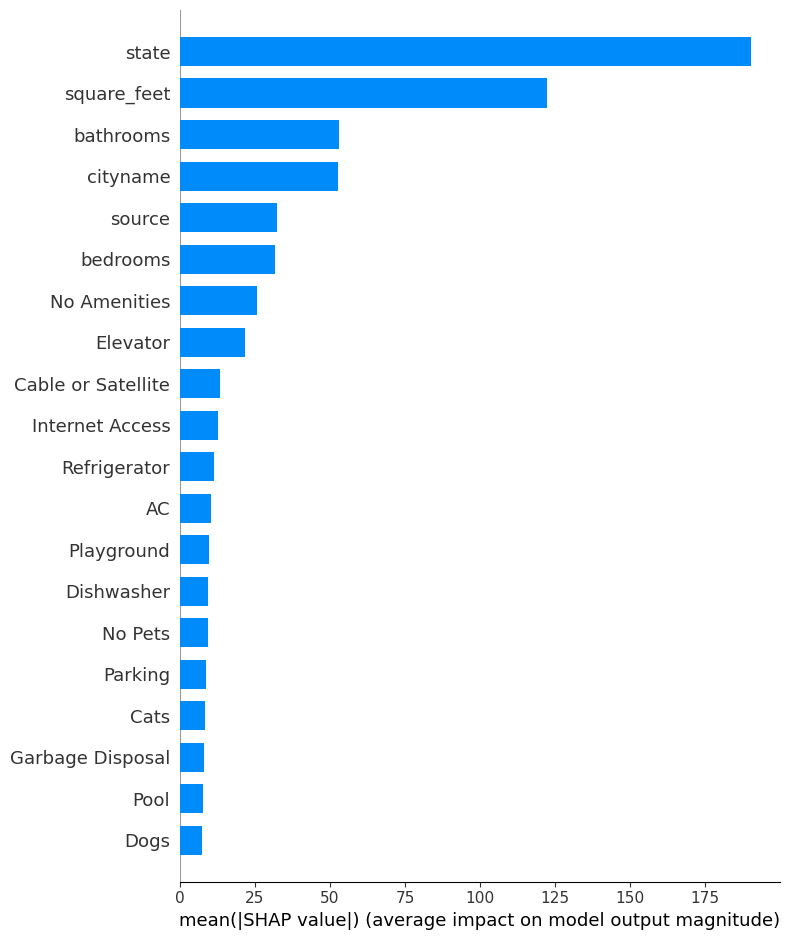

In [114]:
# Summary plot showing feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

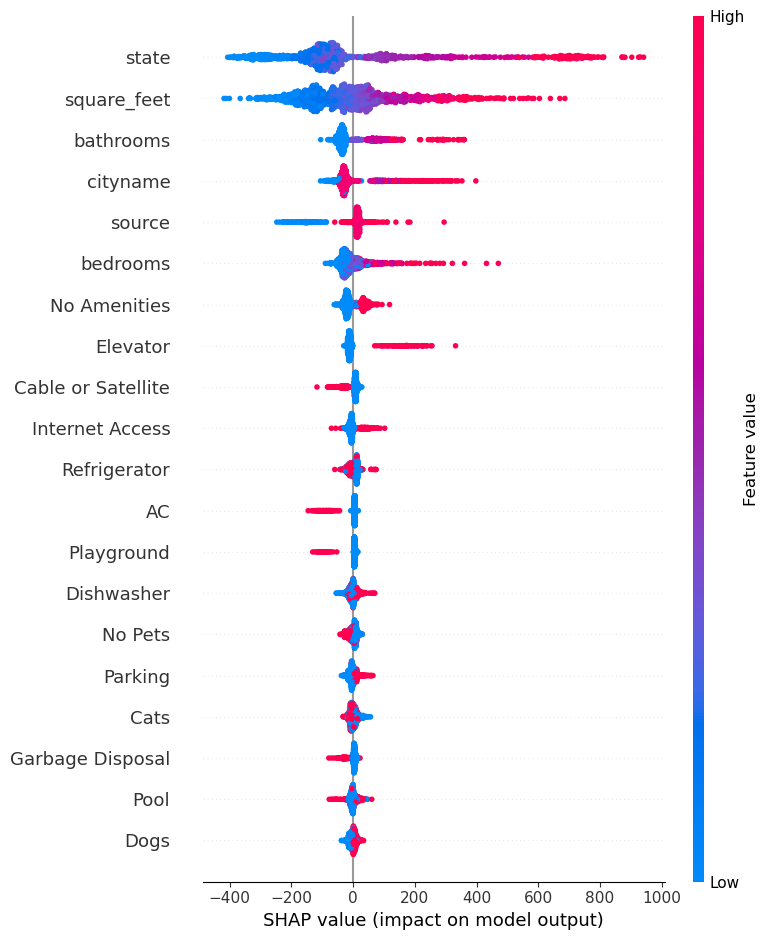

In [115]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_values, X_test)

## Deep Learning

### Fitting

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [117]:
X_train_tensor = torch.FloatTensor(X_train.values if hasattr(X_train, 'values') else X_train)
y_train_tensor = torch.FloatTensor(y_train.values if hasattr(y_train, 'values') else y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test)
y_test_tensor = torch.FloatTensor(y_test.values if hasattr(y_test, 'values') else y_test).reshape(-1, 1)

In [118]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [119]:
class StudentPerformanceNN(nn.Module):
    def __init__(self, input_size):
        super(StudentPerformanceNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.network(x)

In [120]:
def rmse_loss(predictions, targets):
    return torch.sqrt(nn.MSELoss()(predictions, targets))

In [121]:
tflow = StudentPerformanceNN(X_train_tensor.shape[1])

### Cross Validation

In [122]:
criterion = rmse_loss
optimizer = optim.Adam(tflow.parameters(), lr=0.001)

In [123]:
num_epochs = 200
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    tflow.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = tflow(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Validation
    tflow.eval()
    with torch.no_grad():
        val_outputs = tflow(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
    
    train_losses.append(epoch_loss / len(train_loader))
    val_losses.append(val_loss.item())
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss RMSE: {val_losses[-1]:.4f}')

Epoch [20/200], Train Loss: 461.7962, Val Loss RMSE: 81700.7344
Epoch [40/200], Train Loss: 453.9147, Val Loss RMSE: 368.1703
Epoch [60/200], Train Loss: 440.4450, Val Loss RMSE: 376.7926
Epoch [80/200], Train Loss: 434.5618, Val Loss RMSE: 346.7776
Epoch [100/200], Train Loss: 424.2305, Val Loss RMSE: 359.1280
Epoch [120/200], Train Loss: 427.1166, Val Loss RMSE: 349.9669
Epoch [140/200], Train Loss: 429.6684, Val Loss RMSE: 363.6133
Epoch [160/200], Train Loss: 422.0061, Val Loss RMSE: 346.9625
Epoch [180/200], Train Loss: 420.9514, Val Loss RMSE: 345.1684
Epoch [200/200], Train Loss: 420.5149, Val Loss RMSE: 361.0533


### Evaluation

In [124]:
# Make predictions
tflow.eval()
with torch.no_grad():
    y_pred = tflow(X_test_tensor).numpy()

In [125]:
y_test_np = y_test_tensor.numpy()
mse = mean_squared_error(y_test_np, y_pred)
mae = mean_absolute_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)
rmse = np.sqrt(mse)

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate MAPE with handling for zero values
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Handle zero values to avoid division by zero
    non_zero_mask = y_true != 0
    
    if np.sum(non_zero_mask) == 0:
        return np.inf  # All true values are zero
    
    # Calculate MAPE only for non-zero true values
    mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    
    return mape

mape = mean_absolute_percentage_error(y_test_np, y_pred)

In [126]:
# Display all metrics
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Model Performance:
R² Score: 0.4666
Mean Absolute Error (MAE): 257.8526
Root Mean Squared Error (RMSE): 361.0533
Mean Absolute Percentage Error (MAPE): 20.49%


### Explainer

In [127]:
def model_predict(X):
    """
    Wrapper function for SHAP that converts numpy arrays to tensors
    and returns predictions as numpy arrays
    """
    tflow.eval()
    with torch.no_grad():
        if isinstance(X, np.ndarray):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X
        predictions = tflow(X_tensor).numpy()
    return predictions.flatten()

In [128]:
X_test_numpy = X_test_tensor.numpy()
X_train_numpy = X_train_tensor.numpy()

In [129]:
explainer = shap.KernelExplainer(model_predict, X_train_numpy[:100])

In [130]:
print("Calculating SHAP values... (this may take a few minutes)")
shap_values = explainer.shap_values(X_test_numpy[:50])

Calculating SHAP values... (this may take a few minutes)


  0%|          | 0/50 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: divide by zero encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: overflow encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: invalid value encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)


In [131]:
if len(feature_names) != X_test_numpy.shape[1]:
    feature_names = [f'Feature_{i}' for i in range(X_test_numpy.shape[1])]

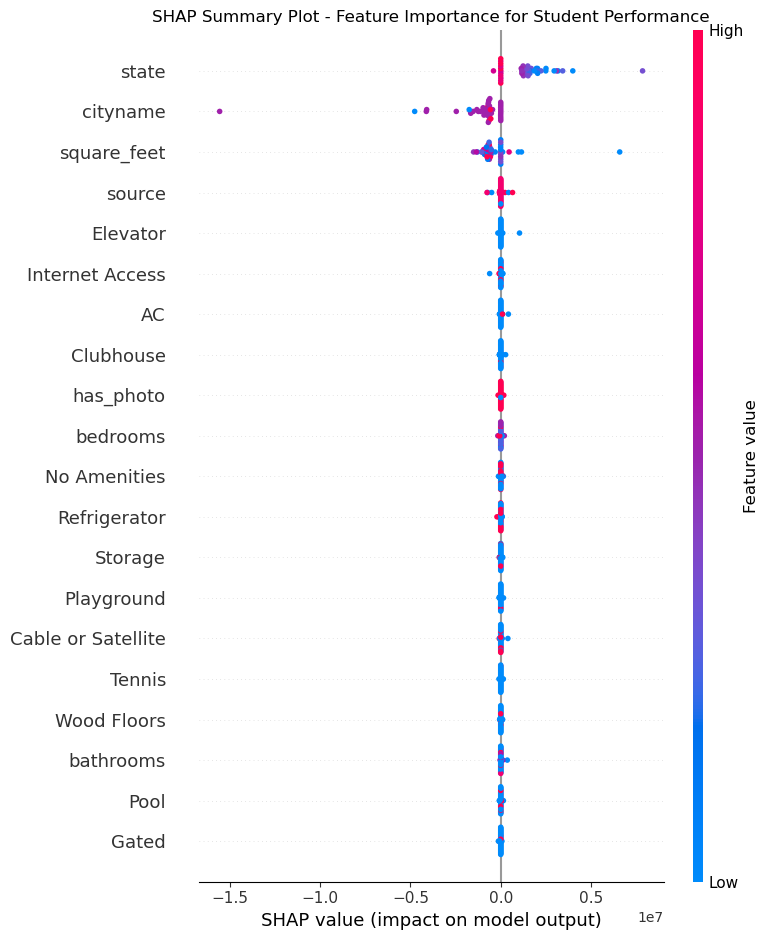

In [132]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_numpy[:50], feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Feature Importance for Student Performance')
plt.tight_layout()
plt.show()

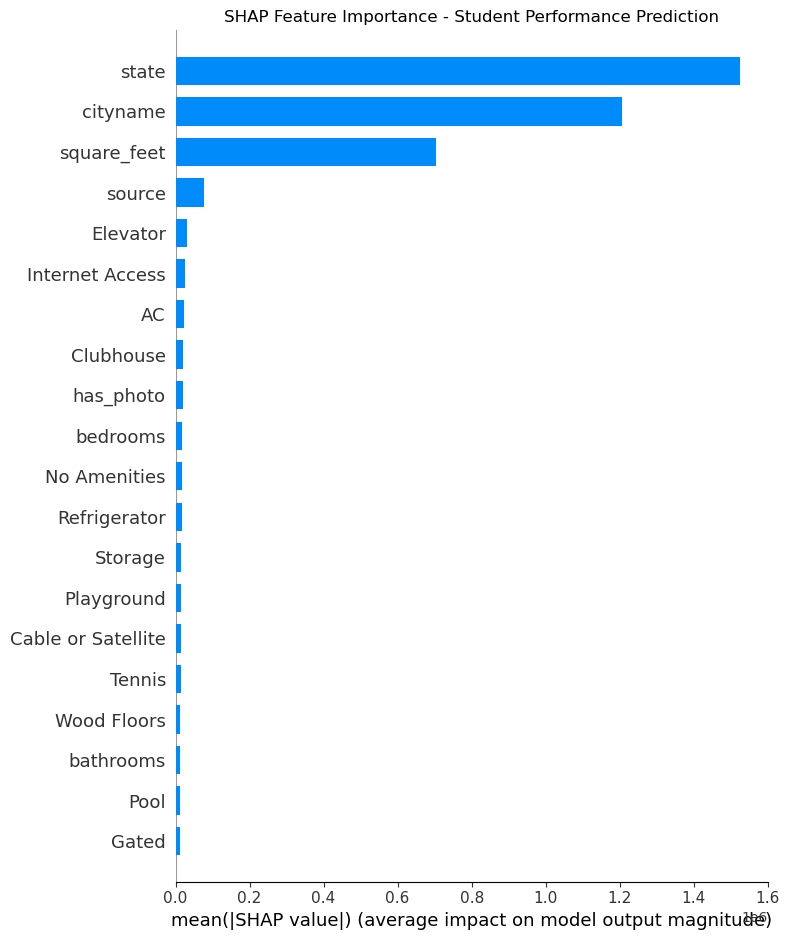

In [133]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_numpy[:50], feature_names=feature_names, 
                  plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Student Performance Prediction')
plt.tight_layout()
plt.show()

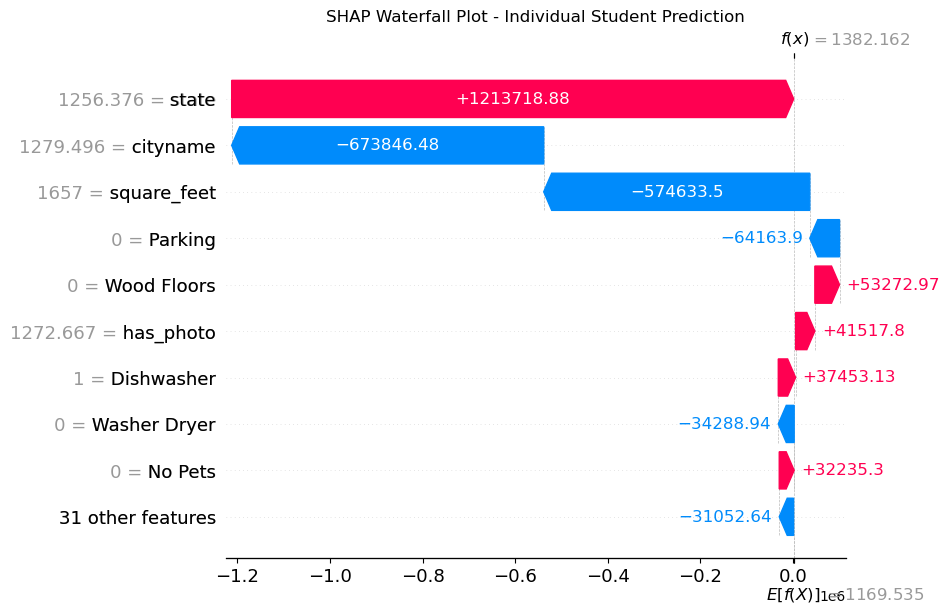

In [134]:
plt.figure(figsize=(12, 8))
plt.title('SHAP Waterfall Plot - Individual Student Prediction')
shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                    base_values=explainer.expected_value,
                                    data=X_test_numpy[0],
                                    feature_names=feature_names))

# Save the Random Forest with Hyperparameter Tuning Model

In [136]:
import joblib

# Assuming your trained model is named rf_model
joblib.dump(best_rf, 'rent_rf.joblib')

['rent_rf.joblib']

In [137]:
joblib.dump(minmax_scaler, 'rent_minmax_scaler.joblib')

['rent_minmax_scaler.joblib']

In [138]:
joblib.dump(mean_encoder, 'rent_mean_encoder.joblib')
joblib.dump(ord_encoder, 'rent_ordinal_encoder.joblib')

['rent_ordinal_encoder.joblib']

In [139]:
joblib.dump(rare_encoder, 'rent_rare_encoder.joblib')

['rent_rare_encoder.joblib']